# Synthetic data generation

In [1]:
import warnings
warnings.filterwarnings(action='ignore', message="numpy.dtype size changed")

In [2]:
import pandas as pd

In [3]:
from synthesized.core import BasicSynthesizer

Instructions for updating:
Use the retry module or similar alternatives.


## Load transactions

In [4]:
data = pd.read_csv('../data/transactions.csv')
data.head(10)

,Unnamed: 0,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account,mean_income
0,0,695247,2378,1993-01-01,1,2.0,700.0,700.0,NaN,NaN,NaN,[ 11271.53754941]
1,1,695250,2378,1993-01-22,1,2.0,7268.0,7968.0,NaN,NaN,NaN,[ 11271.53754941]
2,2,695266,2378,1993-01-23,1,2.0,14440.0,22408.0,NaN,NaN,NaN,[ 11271.53754941]
3,3,695262,2378,1993-01-24,1,2.0,49752.0,72160.0,NaN,NaN,NaN,[ 11271.53754941]
4,4,695265,2378,1993-01-26,1,2.0,21899.0,94059.0,NaN,NaN,NaN,[ 11271.53754941]
5,5,695560,2378,1993-01-31,0,3.0,34700.0,59453.7,NaN,NaN,NaN,[ 11271.53754941]
6,6,3608592,2378,1993-01-31,1,NaN,94.7,94153.7,2,NaN,NaN,[ 11271.53754941]
7,7,695272,2378,1993-02-05,1,2.0,30192.0,89645.7,NaN,NaN,NaN,[ 11271.53754941]
8,8,695340,2378,1993-02-07,0,0.0,9612.0,80033.7,4,EF,1222903.0,[ 11271.53754941]
9,9,695270,2378,1993-02-11,1,2.0,31038.0,111071.7,NaN,NaN,NaN,[ 11271.53754941]


## Clean dataset

* Leave target columns only (so far: type, operation, amount)
* Filter NaN values
* Convert columns to appropriate type

In [5]:
data = data[['type', 'operation', 'amount']]
data = data.dropna()
data = data[data['type'] != 'VYBER']
data['type'] = data['type'].astype(dtype='int')
data['type'] = data['type'].astype(dtype='category')
data['operation'] = data['operation'].astype(dtype='int')
data['operation'] = data['operation'].astype(dtype='category')
data['amount'] = data['amount'].astype(dtype='float32')
data.head(10)

,type,operation,amount
0,1,2,700.0
1,1,2,7268.0
2,1,2,14440.0
3,1,2,49752.0
4,1,2,21899.0
5,0,3,34700.0
7,1,2,30192.0
8,0,0,9612.0
9,1,2,31038.0
10,0,3,25200.0


## Train model and synthesized data

In [6]:
with BasicSynthesizer(
    dtypes=data.dtypes,
    encoding='variational', encoding_size=32, encoder=(32,), decoder=(32,)
) as synthesizer:
    synthesizer.learn(data=data, verbose=True)
    synthesized = synthesizer.synthesize(n=10000)

1: 1.40e+08
2: 1.60e+08
3: 1.79e+08
4: 1.60e+08
5: 6.69e+07
6: 1.03e+08
7: 2.29e+08
8: 7.88e+07
9: 1.28e+08
10: 2.08e+08
11: 1.76e+08
12: 7.82e+07
13: 1.24e+08
14: 8.90e+07
15: 1.40e+08
16: 1.82e+08
17: 7.37e+07
18: 1.87e+08
19: 1.21e+08
20: 1.66e+08
21: 1.35e+08
22: 2.59e+08
23: 1.21e+08
24: 1.30e+08
25: 9.65e+07
26: 1.43e+08
27: 8.11e+07
28: 1.82e+08
29: 1.25e+08
30: 9.97e+07
31: 8.58e+07
32: 1.26e+08
33: 2.14e+08
34: 1.09e+08
35: 4.31e+07
36: 1.73e+08
37: 2.49e+08
38: 1.59e+08
39: 1.34e+08
40: 1.62e+08
41: 8.84e+07
42: 1.84e+08
43: 2.43e+08
44: 9.71e+07
45: 1.36e+08
46: 1.72e+08
47: 9.63e+07
48: 1.07e+08
49: 2.20e+08
50: 1.04e+08
51: 2.12e+08
52: 1.63e+08
53: 1.83e+08
54: 1.43e+08
55: 1.97e+08
56: 2.63e+08
57: 1.71e+08
58: 2.13e+08
59: 2.47e+08
60: 1.26e+08
61: 9.30e+07
62: 1.51e+08
63: 1.64e+08
64: 1.56e+08
65: 1.26e+08
66: 2.22e+08
67: 1.06e+08
68: 2.58e+08
69: 1.35e+08
70: 2.39e+08
71: 1.17e+08
72: 1.14e+08
73: 1.19e+08
74: 1.57e+08
75: 1.74e+08
76: 2.36e+08
77: 1.38e+08
78: 1.16

650: 1.49e+08
651: 1.76e+08
652: 2.42e+08
653: 9.09e+07
654: 2.12e+08
655: 7.78e+07
656: 2.18e+08
657: 1.24e+08
658: 2.03e+08
659: 1.71e+08
660: 1.30e+08
661: 1.40e+08
662: 1.32e+08
663: 6.08e+07
664: 1.21e+08
665: 1.25e+08
666: 1.77e+08
667: 1.59e+08
668: 1.79e+08
669: 1.67e+08
670: 1.30e+08
671: 1.95e+08
672: 1.27e+08
673: 1.33e+08
674: 1.78e+08
675: 3.04e+08
676: 1.72e+08
677: 1.73e+08
678: 1.58e+08
679: 1.14e+08
680: 1.38e+08
681: 8.28e+07
682: 2.05e+08
683: 1.22e+08
684: 2.06e+08
685: 2.11e+08
686: 1.36e+08
687: 2.47e+08
688: 3.20e+08
689: 1.11e+08
690: 1.63e+08
691: 2.32e+08
692: 9.17e+07
693: 8.30e+07
694: 1.21e+08
695: 1.57e+08
696: 2.92e+08
697: 1.08e+08
698: 1.19e+08
699: 7.80e+07
700: 2.04e+08
701: 1.90e+08
702: 2.20e+08
703: 1.08e+08
704: 3.29e+08
705: 1.29e+08
706: 2.44e+08
707: 8.58e+07
708: 1.24e+08
709: 1.52e+08
710: 1.80e+08
711: 1.60e+08
712: 1.64e+08
713: 1.05e+08
714: 2.45e+08
715: 1.85e+08
716: 1.08e+08
717: 1.72e+08
718: 1.49e+08
719: 1.17e+08
720: 1.62e+08
721: 1

1319: 1.28e+08
1320: 1.20e+08
1321: 1.77e+08
1322: 8.00e+07
1323: 1.16e+08
1324: 1.04e+08
1325: 1.38e+08
1326: 1.37e+08
1327: 9.84e+07
1328: 5.84e+07
1329: 2.28e+08
1330: 3.48e+08
1331: 1.38e+08
1332: 1.29e+08
1333: 1.41e+08
1334: 1.31e+08
1335: 1.32e+08
1336: 1.35e+08
1337: 1.91e+08
1338: 1.42e+08
1339: 1.43e+08
1340: 1.20e+08
1341: 1.08e+08
1342: 1.58e+08
1343: 8.93e+07
1344: 1.70e+08
1345: 2.32e+08
1346: 1.19e+08
1347: 1.41e+08
1348: 1.73e+08
1349: 1.63e+08
1350: 1.12e+08
1351: 2.01e+08
1352: 1.00e+08
1353: 5.16e+07
1354: 2.34e+08
1355: 2.24e+08
1356: 6.43e+07
1357: 8.87e+07
1358: 2.23e+08
1359: 2.45e+08
1360: 1.56e+08
1361: 1.17e+08
1362: 2.61e+08
1363: 1.14e+08
1364: 1.47e+08
1365: 1.97e+08
1366: 2.15e+08
1367: 1.09e+08
1368: 2.61e+08
1369: 1.31e+08
1370: 2.21e+08
1371: 6.31e+07
1372: 1.81e+08
1373: 1.83e+08
1374: 1.74e+08
1375: 1.52e+08
1376: 1.98e+08
1377: 4.55e+07
1378: 5.84e+07
1379: 1.16e+08
1380: 1.89e+08
1381: 1.44e+08
1382: 1.43e+08
1383: 1.41e+08
1384: 1.56e+08
1385: 1.66

1885: 1.72e+08
1886: 2.62e+08
1887: 1.85e+08
1888: 1.27e+08
1889: 1.46e+08
1890: 1.17e+08
1891: 1.52e+08
1892: 1.30e+08
1893: 8.80e+07
1894: 9.60e+07
1895: 1.46e+08
1896: 1.66e+08
1897: 1.39e+08
1898: 2.05e+08
1899: 3.17e+07
1900: 8.11e+07
1901: 2.71e+08
1902: 9.73e+07
1903: 8.69e+07
1904: 2.04e+08
1905: 2.19e+08
1906: 1.65e+08
1907: 1.44e+08
1908: 1.62e+08
1909: 1.55e+08
1910: 1.88e+08
1911: 1.25e+08
1912: 1.86e+08
1913: 1.39e+08
1914: 1.27e+08
1915: 1.52e+08
1916: 1.45e+08
1917: 1.52e+08
1918: 1.71e+08
1919: 1.89e+08
1920: 1.83e+08
1921: 1.02e+08
1922: 1.67e+08
1923: 1.84e+08
1924: 1.49e+08
1925: 1.48e+08
1926: 8.66e+07
1927: 1.84e+08
1928: 1.19e+08
1929: 1.42e+08
1930: 1.40e+08
1931: 2.19e+08
1932: 1.15e+08
1933: 2.20e+08
1934: 5.71e+07
1935: 1.16e+08
1936: 2.15e+08
1937: 1.85e+08
1938: 2.22e+08
1939: 7.41e+07
1940: 1.30e+08
1941: 1.04e+08
1942: 1.51e+08
1943: 1.21e+08
1944: 2.33e+08
1945: 1.44e+08
1946: 1.29e+08
1947: 1.71e+08
1948: 2.20e+08
1949: 9.75e+07
1950: 2.66e+08
1951: 2.73

2447: 2.27e+08
2448: 6.62e+07
2449: 4.20e+08
2450: 1.36e+08
2451: 7.93e+07
2452: 1.35e+08
2453: 1.96e+08
2454: 2.00e+08
2455: 1.87e+08
2456: 1.25e+08
2457: 2.05e+08
2458: 1.49e+08
2459: 2.37e+08
2460: 1.05e+08
2461: 1.28e+08
2462: 7.22e+07
2463: 1.08e+08
2464: 1.78e+08
2465: 1.56e+08
2466: 1.96e+08
2467: 1.06e+08
2468: 1.74e+08
2469: 1.05e+08
2470: 1.37e+08
2471: 9.58e+07
2472: 2.42e+08
2473: 1.85e+08
2474: 1.14e+08
2475: 1.23e+08
2476: 2.27e+08
2477: 1.51e+08
2478: 2.64e+08
2479: 1.45e+08
2480: 2.13e+08
2481: 8.71e+07
2482: 2.01e+08
2483: 1.00e+08
2484: 1.13e+08
2485: 7.78e+07
2486: 1.84e+08
2487: 5.91e+07
2488: 1.29e+08
2489: 1.80e+08
2490: 7.63e+07
2491: 1.63e+08
2492: 1.53e+08
2493: 1.46e+08
2494: 1.28e+08
2495: 1.58e+08
2496: 2.62e+08
2497: 2.13e+08
2498: 1.07e+08
2499: 2.01e+08
2500: 1.87e+08
2501: 1.26e+08
2502: 1.20e+08
2503: 1.86e+08
2504: 1.46e+08
2505: 1.16e+08
2506: 1.36e+08
2507: 2.11e+08
2508: 1.01e+08
2509: 1.63e+08
2510: 1.23e+08
2511: 2.37e+08
2512: 8.35e+07
2513: 1.44

3046: 1.84e+08
3047: 1.47e+08
3048: 1.21e+08
3049: 1.02e+08
3050: 6.73e+07
3051: 2.02e+08
3052: 2.01e+08
3053: 1.51e+08
3054: 1.91e+08
3055: 9.40e+07
3056: 1.05e+08
3057: 1.71e+08
3058: 1.18e+08
3059: 2.63e+08
3060: 2.21e+08
3061: 2.20e+08
3062: 2.04e+08
3063: 2.03e+08
3064: 6.30e+07
3065: 2.04e+08
3066: 1.67e+08
3067: 1.52e+08
3068: 1.58e+08
3069: 8.72e+07
3070: 1.49e+08
3071: 1.07e+08
3072: 1.29e+08
3073: 1.73e+08
3074: 9.52e+07
3075: 1.66e+08
3076: 9.87e+07
3077: 1.80e+08
3078: 1.40e+08
3079: 4.78e+07
3080: 1.84e+08
3081: 2.38e+08
3082: 2.62e+08
3083: 2.36e+08
3084: 1.49e+08
3085: 1.71e+08
3086: 1.17e+08
3087: 7.76e+07
3088: 1.71e+08
3089: 1.27e+08
3090: 8.89e+07
3091: 1.65e+08
3092: 1.17e+08
3093: 2.65e+08
3094: 1.60e+08
3095: 1.03e+08
3096: 1.83e+08
3097: 6.40e+07
3098: 9.73e+07
3099: 3.40e+08
3100: 1.21e+08
3101: 9.14e+07
3102: 1.01e+08
3103: 2.25e+08
3104: 3.15e+08
3105: 1.53e+08
3106: 1.39e+08
3107: 1.55e+08
3108: 1.25e+08
3109: 1.45e+08
3110: 6.58e+07
3111: 9.40e+07
3112: 1.47

3649: 1.65e+08
3650: 1.28e+08
3651: 8.07e+07
3652: 1.31e+08
3653: 3.42e+08
3654: 1.45e+08
3655: 1.22e+08
3656: 1.24e+08
3657: 2.29e+08
3658: 2.02e+08
3659: 1.39e+08
3660: 1.18e+08
3661: 2.06e+08
3662: 1.23e+08
3663: 1.80e+08
3664: 1.60e+08
3665: 1.65e+08
3666: 1.57e+08
3667: 3.39e+08
3668: 1.49e+08
3669: 3.29e+08
3670: 1.79e+08
3671: 1.58e+08
3672: 9.57e+07
3673: 1.29e+08
3674: 1.18e+08
3675: 2.47e+08
3676: 1.12e+08
3677: 1.28e+08
3678: 1.21e+08
3679: 1.67e+08
3680: 1.43e+08
3681: 5.73e+07
3682: 1.12e+08
3683: 2.14e+08
3684: 5.21e+07
3685: 9.08e+07
3686: 1.37e+08
3687: 1.37e+08
3688: 2.47e+08
3689: 1.89e+08
3690: 1.18e+08
3691: 1.46e+08
3692: 1.03e+08
3693: 2.10e+08
3694: 1.56e+08
3695: 1.83e+08
3696: 1.18e+08
3697: 1.34e+08
3698: 2.34e+08
3699: 2.09e+08
3700: 1.12e+08
3701: 1.10e+08
3702: 2.63e+08
3703: 1.33e+08
3704: 1.65e+08
3705: 1.37e+08
3706: 6.90e+07
3707: 1.93e+08
3708: 1.82e+08
3709: 1.38e+08
3710: 1.70e+08
3711: 1.45e+08
3712: 2.13e+08
3713: 1.45e+08
3714: 1.70e+08
3715: 2.11

4242: 9.84e+07
4243: 1.16e+08
4244: 3.02e+08
4245: 7.63e+07
4246: 1.62e+08
4247: 7.31e+07
4248: 1.58e+08
4249: 1.86e+08
4250: 1.31e+08
4251: 5.82e+07
4252: 1.09e+08
4253: 1.48e+08
4254: 1.81e+08
4255: 9.15e+07
4256: 1.54e+08
4257: 6.74e+07
4258: 1.01e+08
4259: 9.59e+07
4260: 1.14e+08
4261: 1.54e+08
4262: 2.14e+08
4263: 2.20e+08
4264: 5.40e+07
4265: 1.21e+08
4266: 1.55e+08
4267: 1.55e+08
4268: 1.31e+08
4269: 7.41e+07
4270: 2.61e+08
4271: 1.39e+08
4272: 1.14e+08
4273: 1.20e+08
4274: 1.43e+08
4275: 9.87e+07
4276: 1.58e+08
4277: 1.80e+08
4278: 1.14e+08
4279: 1.03e+08
4280: 1.17e+08
4281: 2.22e+08
4282: 1.49e+08
4283: 1.51e+08
4284: 1.06e+08
4285: 1.61e+08
4286: 1.16e+08
4287: 1.93e+08
4288: 7.27e+07
4289: 1.20e+08
4290: 1.89e+08
4291: 1.48e+08
4292: 2.00e+08
4293: 2.12e+08
4294: 1.41e+08
4295: 1.63e+08
4296: 7.42e+07
4297: 3.16e+08
4298: 2.10e+08
4299: 1.13e+08
4300: 1.75e+08
4301: 7.06e+07
4302: 1.45e+08
4303: 1.34e+08
4304: 8.85e+07
4305: 2.19e+08
4306: 1.67e+08
4307: 1.03e+08
4308: 1.52

4805: 1.37e+08
4806: 1.08e+08
4807: 1.27e+08
4808: 1.87e+08
4809: 6.03e+07
4810: 1.18e+08
4811: 2.55e+08
4812: 1.94e+08
4813: 8.80e+07
4814: 1.45e+08
4815: 1.03e+08
4816: 1.13e+08
4817: 8.02e+07
4818: 1.19e+08
4819: 1.36e+08
4820: 2.18e+08
4821: 1.16e+08
4822: 1.04e+08
4823: 1.22e+08
4824: 1.11e+08
4825: 7.40e+07
4826: 2.34e+08
4827: 2.42e+08
4828: 1.57e+08
4829: 8.63e+07
4830: 7.97e+07
4831: 1.16e+08
4832: 2.74e+08
4833: 1.62e+08
4834: 9.59e+07
4835: 1.47e+08
4836: 7.64e+07
4837: 1.86e+08
4838: 9.34e+07
4839: 1.36e+08
4840: 8.07e+07
4841: 1.26e+08
4842: 5.97e+07
4843: 1.34e+08
4844: 2.03e+08
4845: 1.10e+08
4846: 1.14e+08
4847: 2.15e+08
4848: 1.00e+08
4849: 1.36e+08
4850: 8.17e+07
4851: 1.55e+08
4852: 2.21e+08
4853: 2.45e+08
4854: 1.76e+08
4855: 2.34e+08
4856: 1.45e+08
4857: 1.62e+08
4858: 2.50e+08
4859: 1.20e+08
4860: 1.05e+08
4861: 2.00e+08
4862: 1.57e+08
4863: 2.62e+08
4864: 7.07e+07
4865: 7.82e+07
4866: 1.20e+08
4867: 1.14e+08
4868: 1.40e+08
4869: 8.19e+07
4870: 1.53e+08
4871: 8.93

5392: 8.93e+07
5393: 1.00e+08
5394: 1.69e+08
5395: 1.19e+08
5396: 3.27e+08
5397: 1.78e+08
5398: 1.86e+08
5399: 8.48e+07
5400: 3.14e+08
5401: 1.89e+08
5402: 1.97e+08
5403: 1.75e+08
5404: 1.08e+08
5405: 4.78e+07
5406: 6.53e+07
5407: 2.25e+08
5408: 1.18e+08
5409: 1.11e+08
5410: 1.55e+08
5411: 1.84e+08
5412: 1.18e+08
5413: 1.17e+08
5414: 1.14e+08
5415: 1.06e+08
5416: 1.90e+08
5417: 7.54e+07
5418: 1.25e+08
5419: 2.25e+08
5420: 1.32e+08
5421: 7.32e+07
5422: 8.60e+07
5423: 8.27e+07
5424: 2.79e+08
5425: 1.78e+08
5426: 8.64e+07
5427: 1.06e+08
5428: 1.28e+08
5429: 1.14e+08
5430: 9.26e+07
5431: 1.25e+08
5432: 1.06e+08
5433: 1.23e+08
5434: 1.66e+08
5435: 1.84e+08
5436: 1.23e+08
5437: 1.32e+08
5438: 2.30e+08
5439: 8.61e+07
5440: 1.09e+08
5441: 2.76e+08
5442: 2.07e+08
5443: 1.22e+08
5444: 1.05e+08
5445: 1.09e+08
5446: 1.55e+08
5447: 2.76e+08
5448: 8.08e+07
5449: 5.19e+07
5450: 2.07e+08
5451: 2.33e+08
5452: 7.95e+07
5453: 2.95e+08
5454: 2.26e+08
5455: 2.14e+08
5456: 1.54e+08
5457: 1.14e+08
5458: 8.47

6004: 2.41e+08
6005: 1.65e+08
6006: 1.86e+08
6007: 1.22e+08
6008: 1.39e+08
6009: 1.72e+08
6010: 1.41e+08
6011: 8.85e+07
6012: 2.45e+08
6013: 1.81e+08
6014: 1.64e+08
6015: 1.19e+08
6016: 1.19e+08
6017: 2.16e+08
6018: 1.82e+08
6019: 1.18e+08
6020: 1.49e+08
6021: 1.64e+08
6022: 2.02e+08
6023: 1.49e+08
6024: 1.11e+08
6025: 7.90e+07
6026: 2.65e+08
6027: 1.11e+08
6028: 1.53e+08
6029: 8.20e+07
6030: 1.26e+08
6031: 2.51e+08
6032: 1.46e+08
6033: 7.21e+07
6034: 1.14e+08
6035: 1.15e+08
6036: 1.16e+08
6037: 1.79e+08
6038: 1.30e+08
6039: 1.51e+08
6040: 6.49e+07
6041: 1.58e+08
6042: 1.85e+08
6043: 1.79e+08
6044: 1.68e+08
6045: 1.07e+08
6046: 9.99e+07
6047: 2.02e+08
6048: 9.40e+07
6049: 2.07e+08
6050: 1.00e+08
6051: 1.08e+08
6052: 3.20e+08
6053: 2.07e+08
6054: 1.70e+08
6055: 1.38e+08
6056: 6.74e+07
6057: 5.57e+07
6058: 1.21e+08
6059: 3.32e+08
6060: 1.54e+08
6061: 2.08e+08
6062: 3.58e+07
6063: 1.74e+08
6064: 1.14e+08
6065: 1.03e+08
6066: 9.70e+07
6067: 9.18e+07
6068: 1.16e+08
6069: 1.68e+08
6070: 2.81

6566: 2.40e+08
6567: 1.35e+08
6568: 2.46e+08
6569: 1.16e+08
6570: 2.66e+08
6571: 1.35e+08
6572: 1.31e+08
6573: 3.13e+08
6574: 1.04e+08
6575: 1.76e+08
6576: 1.36e+08
6577: 1.32e+08
6578: 1.65e+08
6579: 1.72e+08
6580: 1.81e+08
6581: 1.51e+08
6582: 1.30e+08
6583: 1.83e+08
6584: 2.03e+08
6585: 1.69e+08
6586: 1.62e+08
6587: 2.15e+08
6588: 1.70e+08
6589: 1.53e+08
6590: 1.63e+08
6591: 1.56e+08
6592: 1.74e+08
6593: 1.09e+08
6594: 1.85e+08
6595: 1.53e+08
6596: 1.12e+08
6597: 1.57e+08
6598: 1.11e+08
6599: 1.61e+08
6600: 2.98e+08
6601: 1.52e+08
6602: 1.99e+08
6603: 1.37e+08
6604: 1.96e+08
6605: 8.20e+07
6606: 1.15e+08
6607: 1.35e+08
6608: 1.72e+08
6609: 1.53e+08
6610: 9.25e+07
6611: 1.42e+08
6612: 1.73e+08
6613: 1.43e+08
6614: 1.07e+08
6615: 1.51e+08
6616: 1.02e+08
6617: 3.34e+08
6618: 1.55e+08
6619: 1.78e+08
6620: 1.35e+08
6621: 1.73e+08
6622: 1.86e+08
6623: 1.75e+08
6624: 1.39e+08
6625: 1.57e+08
6626: 1.60e+08
6627: 1.00e+08
6628: 1.05e+08
6629: 1.37e+08
6630: 1.40e+08
6631: 1.03e+08
6632: 1.00

7165: 1.59e+08
7166: 1.25e+08
7167: 1.92e+08
7168: 1.47e+08
7169: 1.98e+08
7170: 9.52e+07
7171: 1.29e+08
7172: 1.32e+08
7173: 1.69e+08
7174: 1.50e+08
7175: 1.00e+08
7176: 1.29e+08
7177: 7.76e+07
7178: 1.21e+08
7179: 1.80e+08
7180: 1.05e+08
7181: 1.28e+08
7182: 1.57e+08
7183: 1.34e+08
7184: 1.13e+08
7185: 1.24e+08
7186: 1.42e+08
7187: 1.35e+08
7188: 7.00e+07
7189: 1.05e+08
7190: 2.22e+08
7191: 1.53e+08
7192: 1.29e+08
7193: 1.31e+08
7194: 7.10e+07
7195: 8.42e+07
7196: 1.49e+08
7197: 8.00e+07
7198: 1.80e+08
7199: 1.61e+08
7200: 2.02e+08
7201: 2.02e+08
7202: 9.77e+07
7203: 1.50e+08
7204: 1.66e+08
7205: 5.97e+07
7206: 1.41e+08
7207: 1.96e+08
7208: 2.89e+08
7209: 9.14e+07
7210: 1.03e+08
7211: 1.43e+08
7212: 1.35e+08
7213: 1.37e+08
7214: 2.26e+08
7215: 8.07e+07
7216: 1.08e+08
7217: 1.60e+08
7218: 1.96e+08
7219: 9.61e+07
7220: 1.43e+08
7221: 1.40e+08
7222: 1.09e+08
7223: 1.22e+08
7224: 9.17e+07
7225: 2.00e+08
7226: 7.11e+07
7227: 9.63e+07
7228: 1.41e+08
7229: 1.50e+08
7230: 1.41e+08
7231: 8.97

7731: 1.14e+08
7732: 1.38e+08
7733: 8.93e+07
7734: 1.88e+08
7735: 1.59e+08
7736: 1.05e+08
7737: 1.46e+08
7738: 1.58e+08
7739: 1.36e+08
7740: 1.23e+08
7741: 1.55e+08
7742: 1.57e+08
7743: 1.24e+08
7744: 9.65e+07
7745: 9.84e+07
7746: 1.50e+08
7747: 1.45e+08
7748: 1.04e+08
7749: 2.35e+08
7750: 1.14e+08
7751: 1.81e+08
7752: 1.84e+08
7753: 3.75e+08
7754: 8.78e+07
7755: 1.03e+08
7756: 1.14e+08
7757: 9.11e+07
7758: 1.43e+08
7759: 8.75e+07
7760: 1.09e+08
7761: 1.38e+08
7762: 6.10e+07
7763: 2.09e+08
7764: 2.16e+08
7765: 1.89e+08
7766: 1.18e+08
7767: 1.54e+08
7768: 1.56e+08
7769: 1.38e+08
7770: 1.12e+08
7771: 1.49e+08
7772: 1.55e+08
7773: 1.39e+08
7774: 1.25e+08
7775: 7.78e+07
7776: 1.55e+08
7777: 1.37e+08
7778: 1.35e+08
7779: 1.77e+08
7780: 1.01e+08
7781: 1.86e+08
7782: 1.68e+08
7783: 1.02e+08
7784: 7.70e+07
7785: 1.37e+08
7786: 1.23e+08
7787: 1.91e+08
7788: 1.44e+08
7789: 1.91e+08
7790: 2.58e+08
7791: 1.96e+08
7792: 2.40e+08
7793: 1.43e+08
7794: 1.51e+08
7795: 1.99e+08
7796: 1.01e+08
7797: 7.76

8352: 1.89e+08
8353: 1.30e+08
8354: 1.64e+08
8355: 1.95e+08
8356: 1.22e+08
8357: 9.82e+07
8358: 2.57e+08
8359: 1.91e+08
8360: 1.02e+08
8361: 1.67e+08
8362: 1.16e+08
8363: 6.74e+07
8364: 1.38e+08
8365: 1.62e+08
8366: 1.70e+08
8367: 1.42e+08
8368: 1.06e+08
8369: 2.02e+08
8370: 1.74e+08
8371: 1.30e+08
8372: 1.03e+08
8373: 7.31e+07
8374: 1.53e+08
8375: 8.15e+07
8376: 7.96e+07
8377: 1.06e+08
8378: 1.97e+08
8379: 5.21e+07
8380: 1.85e+08
8381: 1.82e+08
8382: 2.10e+08
8383: 4.37e+07
8384: 2.18e+08
8385: 1.08e+08
8386: 1.60e+08
8387: 1.21e+08
8388: 1.69e+08
8389: 9.81e+07
8390: 1.21e+08
8391: 1.54e+08
8392: 1.25e+08
8393: 1.72e+08
8394: 2.24e+08
8395: 9.25e+07
8396: 1.64e+08
8397: 6.32e+07
8398: 2.13e+08
8399: 1.03e+08
8400: 2.33e+08
8401: 1.59e+08
8402: 6.96e+07
8403: 1.56e+08
8404: 1.32e+08
8405: 1.10e+08
8406: 1.94e+08
8407: 1.60e+08
8408: 2.07e+08
8409: 7.37e+07
8410: 1.22e+08
8411: 1.32e+08
8412: 2.50e+08
8413: 1.98e+08
8414: 1.51e+08
8415: 1.77e+08
8416: 1.06e+08
8417: 1.36e+08
8418: 7.39

8915: 1.48e+08
8916: 1.03e+08
8917: 1.42e+08
8918: 1.73e+08
8919: 1.30e+08
8920: 8.53e+07
8921: 1.04e+08
8922: 1.25e+08
8923: 1.10e+08
8924: 9.42e+07
8925: 1.27e+08
8926: 1.05e+08
8927: 1.89e+08
8928: 9.29e+07
8929: 1.11e+08
8930: 2.93e+08
8931: 1.85e+08
8932: 2.09e+08
8933: 1.85e+08
8934: 1.45e+08
8935: 1.57e+08
8936: 1.38e+08
8937: 1.17e+08
8938: 1.62e+08
8939: 1.93e+08
8940: 2.85e+08
8941: 9.37e+07
8942: 1.14e+08
8943: 1.26e+08
8944: 1.43e+08
8945: 8.62e+07
8946: 8.84e+07
8947: 7.17e+07
8948: 1.28e+08
8949: 2.61e+08
8950: 1.31e+08
8951: 1.79e+08
8952: 1.33e+08
8953: 1.21e+08
8954: 1.30e+08
8955: 1.67e+08
8956: 1.31e+08
8957: 9.01e+07
8958: 1.53e+08
8959: 1.58e+08
8960: 1.12e+08
8961: 1.42e+08
8962: 2.56e+08
8963: 1.64e+08
8964: 8.19e+07
8965: 8.55e+07
8966: 1.51e+08
8967: 1.45e+08
8968: 1.25e+08
8969: 2.46e+08
8970: 1.29e+08
8971: 1.53e+08
8972: 8.95e+07
8973: 1.98e+08
8974: 1.57e+08
8975: 1.10e+08
8976: 3.10e+08
8977: 1.72e+08
8978: 1.07e+08
8979: 1.56e+08
8980: 6.18e+07
8981: 4.71

9541: 1.59e+08
9542: 1.09e+08
9543: 1.90e+08
9544: 9.40e+07
9545: 1.98e+08
9546: 1.26e+08
9547: 1.14e+08
9548: 1.23e+08
9549: 1.18e+08
9550: 1.95e+08
9551: 2.00e+08
9552: 1.01e+08
9553: 1.63e+08
9554: 1.32e+08
9555: 1.57e+08
9556: 1.06e+08
9557: 1.04e+08
9558: 1.28e+08
9559: 1.74e+08
9560: 1.12e+08
9561: 1.37e+08
9562: 2.47e+08
9563: 1.18e+08
9564: 1.45e+08
9565: 1.75e+08
9566: 8.72e+07
9567: 1.32e+08
9568: 1.77e+08
9569: 9.16e+07
9570: 1.45e+08
9571: 8.67e+07
9572: 8.58e+07
9573: 1.13e+08
9574: 9.58e+07
9575: 1.66e+08
9576: 6.58e+07
9577: 1.12e+08
9578: 2.56e+08
9579: 1.07e+08
9580: 1.72e+08
9581: 1.24e+08
9582: 1.69e+08
9583: 1.01e+08
9584: 2.37e+08
9585: 1.19e+08
9586: 1.68e+08
9587: 1.59e+08
9588: 1.98e+08
9589: 7.33e+07
9590: 1.22e+08
9591: 2.09e+08
9592: 2.39e+08
9593: 1.05e+08
9594: 2.34e+08
9595: 1.13e+08
9596: 1.18e+08
9597: 1.76e+08
9598: 9.42e+07
9599: 1.43e+08
9600: 7.77e+07
9601: 1.74e+08
9602: 1.06e+08
9603: 2.11e+08
9604: 5.70e+07
9605: 1.69e+08
9606: 1.08e+08
9607: 1.16

10105: 1.15e+08
10106: 1.82e+08
10107: 5.03e+07
10108: 1.16e+08
10109: 1.31e+08
10110: 2.00e+08
10111: 8.28e+07
10112: 1.37e+08
10113: 1.94e+08
10114: 1.11e+08
10115: 2.18e+08
10116: 1.28e+08
10117: 1.82e+08
10118: 1.09e+08
10119: 1.61e+08
10120: 1.74e+08
10121: 1.70e+08
10122: 8.50e+07
10123: 1.27e+08
10124: 1.21e+08
10125: 6.93e+07
10126: 1.87e+08
10127: 2.32e+08
10128: 1.21e+08
10129: 1.87e+08
10130: 6.47e+07
10131: 1.47e+08
10132: 1.78e+08
10133: 1.64e+08
10134: 1.33e+08
10135: 1.41e+08
10136: 1.31e+08
10137: 6.16e+07
10138: 8.75e+07
10139: 1.40e+08
10140: 1.06e+08
10141: 2.29e+08
10142: 1.17e+08
10143: 7.25e+07
10144: 1.78e+08
10145: 8.62e+07
10146: 1.86e+08
10147: 1.53e+08
10148: 1.09e+08
10149: 8.49e+07
10150: 1.55e+08
10151: 1.45e+08
10152: 1.48e+08
10153: 1.38e+08
10154: 1.87e+08
10155: 1.35e+08
10156: 1.64e+08
10157: 1.58e+08
10158: 1.68e+08
10159: 2.30e+08
10160: 8.53e+07
10161: 1.03e+08
10162: 1.69e+08
10163: 1.18e+08
10164: 1.19e+08
10165: 8.22e+07
10166: 2.00e+08
10167: 1

10669: 9.65e+07
10670: 3.42e+07
10671: 1.59e+08
10672: 1.67e+08
10673: 9.55e+07
10674: 1.40e+08
10675: 1.17e+08
10676: 1.66e+08
10677: 1.41e+08
10678: 2.87e+08
10679: 1.77e+08
10680: 5.77e+07
10681: 1.70e+08
10682: 1.52e+08
10683: 9.34e+07
10684: 2.82e+08
10685: 1.88e+08
10686: 1.48e+08
10687: 5.48e+07
10688: 6.36e+07
10689: 1.89e+08
10690: 1.98e+08
10691: 6.71e+07
10692: 1.76e+08
10693: 1.96e+08
10694: 2.06e+08
10695: 1.73e+08
10696: 1.48e+08
10697: 9.14e+07
10698: 1.52e+08
10699: 1.87e+08
10700: 1.05e+08
10701: 1.24e+08
10702: 4.00e+07
10703: 1.42e+08
10704: 1.09e+08
10705: 9.15e+07
10706: 1.63e+08
10707: 2.24e+08
10708: 8.25e+07
10709: 1.48e+08
10710: 2.77e+08
10711: 1.51e+08
10712: 1.41e+08
10713: 2.33e+08
10714: 1.64e+08
10715: 1.26e+08
10716: 1.71e+08
10717: 1.08e+08
10718: 1.29e+08
10719: 8.45e+07
10720: 5.43e+07
10721: 8.73e+07
10722: 1.56e+08
10723: 1.48e+08
10724: 6.33e+07
10725: 9.78e+07
10726: 1.24e+08
10727: 6.64e+07
10728: 1.74e+08
10729: 9.65e+07
10730: 5.84e+07
10731: 1

11256: 1.80e+08
11257: 1.97e+08
11258: 1.56e+08
11259: 1.16e+08
11260: 8.30e+07
11261: 1.34e+08
11262: 1.30e+08
11263: 1.64e+08
11264: 1.83e+08
11265: 1.07e+08
11266: 7.88e+07
11267: 1.64e+08
11268: 9.15e+07
11269: 1.29e+08
11270: 1.36e+08
11271: 1.90e+08
11272: 1.24e+08
11273: 1.01e+08
11274: 7.23e+07
11275: 1.84e+08
11276: 2.68e+08
11277: 1.59e+08
11278: 1.09e+08
11279: 2.02e+08
11280: 1.97e+08
11281: 1.39e+08
11282: 5.70e+07
11283: 2.14e+08
11284: 1.61e+08
11285: 1.93e+08
11286: 1.00e+08
11287: 2.81e+08
11288: 3.03e+07
11289: 2.15e+08
11290: 1.26e+08
11291: 9.02e+07
11292: 1.05e+08
11293: 2.24e+08
11294: 1.21e+08
11295: 2.12e+08
11296: 1.50e+08
11297: 2.63e+08
11298: 1.11e+08
11299: 1.33e+08
11300: 1.25e+08
11301: 2.36e+08
11302: 1.80e+08
11303: 1.16e+08
11304: 9.47e+07
11305: 1.62e+08
11306: 1.57e+08
11307: 2.52e+08
11308: 2.01e+08
11309: 2.04e+08
11310: 1.26e+08
11311: 1.21e+08
11312: 4.86e+07
11313: 1.63e+08
11314: 1.56e+08
11315: 1.23e+08
11316: 1.25e+08
11317: 1.08e+08
11318: 9

11819: 2.74e+08
11820: 5.20e+07
11821: 9.81e+07
11822: 1.41e+08
11823: 1.74e+08
11824: 1.12e+08
11825: 1.47e+08
11826: 1.91e+08
11827: 1.49e+08
11828: 2.06e+08
11829: 1.82e+08
11830: 1.65e+08
11831: 2.35e+08
11832: 1.48e+08
11833: 1.92e+08
11834: 1.15e+08
11835: 1.70e+08
11836: 8.49e+07
11837: 1.42e+08
11838: 1.15e+08
11839: 1.26e+08
11840: 1.46e+08
11841: 8.96e+07
11842: 1.26e+08
11843: 1.46e+08
11844: 1.20e+08
11845: 2.30e+08
11846: 1.62e+08
11847: 1.53e+08
11848: 1.48e+08
11849: 1.17e+08
11850: 1.50e+08
11851: 2.62e+08
11852: 7.60e+07
11853: 1.13e+08
11854: 7.24e+07
11855: 1.32e+08
11856: 1.68e+08
11857: 1.48e+08
11858: 1.08e+08
11859: 1.17e+08
11860: 1.72e+08
11861: 2.44e+08
11862: 1.72e+08
11863: 1.10e+08
11864: 5.59e+07
11865: 2.03e+08
11866: 7.81e+07
11867: 8.33e+07
11868: 3.18e+08
11869: 1.20e+08
11870: 1.00e+08
11871: 8.26e+07
11872: 1.52e+08
11873: 9.89e+07
11874: 1.69e+08
11875: 1.13e+08
11876: 7.51e+07
11877: 1.13e+08
11878: 1.86e+08
11879: 1.03e+08
11880: 1.53e+08
11881: 1

12440: 1.28e+08
12441: 1.20e+08
12442: 1.29e+08
12443: 7.84e+07
12444: 1.45e+08
12445: 1.20e+08
12446: 1.17e+08
12447: 1.78e+08
12448: 1.48e+08
12449: 1.54e+08
12450: 1.27e+08
12451: 8.48e+07
12452: 1.04e+08
12453: 1.21e+08
12454: 1.67e+08
12455: 1.08e+08
12456: 3.98e+07
12457: 1.56e+08
12458: 1.35e+08
12459: 2.58e+08
12460: 1.06e+08
12461: 1.10e+08
12462: 2.03e+08
12463: 1.68e+08
12464: 1.16e+08
12465: 1.06e+08
12466: 1.49e+08
12467: 7.44e+07
12468: 8.67e+07
12469: 1.98e+08
12470: 1.81e+08
12471: 4.91e+07
12472: 1.50e+08
12473: 9.46e+07
12474: 1.44e+08
12475: 1.59e+08
12476: 1.48e+08
12477: 1.60e+08
12478: 1.28e+08
12479: 1.22e+08
12480: 1.21e+08
12481: 7.24e+07
12482: 1.74e+08
12483: 8.26e+07
12484: 1.36e+08
12485: 8.70e+07
12486: 1.29e+08
12487: 1.31e+08
12488: 9.15e+07
12489: 1.22e+08
12490: 7.72e+07
12491: 7.57e+07
12492: 2.44e+08
12493: 1.48e+08
12494: 2.04e+08
12495: 9.54e+07
12496: 2.72e+08
12497: 2.33e+08
12498: 9.95e+07
12499: 1.15e+08
12500: 1.47e+08
12501: 1.79e+08
12502: 7

12973: 1.67e+08
12974: 1.51e+08
12975: 1.34e+08
12976: 7.23e+07
12977: 1.48e+08
12978: 6.45e+07
12979: 9.16e+07
12980: 1.59e+08
12981: 1.70e+08
12982: 1.34e+08
12983: 9.14e+07
12984: 1.54e+08
12985: 1.95e+08
12986: 1.03e+08
12987: 9.62e+07
12988: 9.37e+07
12989: 1.30e+08
12990: 8.96e+07
12991: 1.32e+08
12992: 1.26e+08
12993: 1.89e+08
12994: 1.62e+08
12995: 1.25e+08
12996: 6.54e+07
12997: 1.17e+08
12998: 9.02e+07
12999: 9.75e+07
13000: 1.41e+08
13001: 1.00e+08
13002: 2.82e+08
13003: 1.76e+08
13004: 1.07e+08
13005: 1.52e+08
13006: 9.16e+07
13007: 1.50e+08
13008: 1.80e+08
13009: 1.88e+08
13010: 2.03e+08
13011: 1.16e+08
13012: 8.10e+07
13013: 1.09e+08
13014: 2.12e+08
13015: 1.60e+08
13016: 1.62e+08
13017: 7.45e+07
13018: 1.21e+08
13019: 1.74e+08
13020: 2.79e+08
13021: 9.52e+07
13022: 1.60e+08
13023: 1.04e+08
13024: 1.40e+08
13025: 1.76e+08
13026: 1.91e+08
13027: 1.44e+08
13028: 1.24e+08
13029: 1.32e+08
13030: 1.22e+08
13031: 1.62e+08
13032: 1.49e+08
13033: 5.50e+07
13034: 1.08e+08
13035: 2

13578: 9.54e+07
13579: 1.90e+08
13580: 2.34e+08
13581: 1.89e+08
13582: 1.07e+08
13583: 5.26e+07
13584: 1.70e+08
13585: 1.39e+08
13586: 1.46e+08
13587: 1.10e+08
13588: 1.80e+08
13589: 1.42e+08
13590: 1.43e+08
13591: 9.77e+07
13592: 5.78e+07
13593: 2.10e+08
13594: 1.75e+08
13595: 1.62e+08
13596: 2.35e+08
13597: 1.54e+08
13598: 1.19e+08
13599: 1.40e+08
13600: 8.70e+07
13601: 1.76e+08
13602: 1.13e+08
13603: 9.47e+07
13604: 9.40e+07
13605: 1.21e+08
13606: 1.69e+08
13607: 5.13e+07
13608: 6.87e+07
13609: 1.13e+08
13610: 1.15e+08
13611: 8.02e+07
13612: 1.94e+08
13613: 9.29e+07
13614: 6.21e+07
13615: 8.55e+07
13616: 1.71e+08
13617: 1.00e+08
13618: 1.07e+08
13619: 1.43e+08
13620: 1.20e+08
13621: 1.42e+08
13622: 1.40e+08
13623: 8.89e+07
13624: 1.97e+08
13625: 7.89e+07
13626: 1.80e+08
13627: 1.23e+08
13628: 1.11e+08
13629: 1.16e+08
13630: 1.63e+08
13631: 2.98e+08
13632: 9.83e+07
13633: 9.11e+07
13634: 1.31e+08
13635: 1.85e+08
13636: 1.32e+08
13637: 2.32e+08
13638: 1.81e+08
13639: 1.21e+08
13640: 1

14173: 6.04e+07
14174: 1.28e+08
14175: 1.40e+08
14176: 1.45e+08
14177: 1.27e+08
14178: 6.77e+07
14179: 6.70e+07
14180: 1.87e+08
14181: 6.82e+07
14182: 5.91e+07
14183: 1.44e+08
14184: 1.28e+08
14185: 6.42e+07
14186: 1.09e+08
14187: 1.45e+08
14188: 2.12e+08
14189: 8.45e+07
14190: 3.00e+08
14191: 1.32e+08
14192: 1.12e+08
14193: 9.96e+07
14194: 1.16e+08
14195: 1.12e+08
14196: 8.65e+07
14197: 1.08e+08
14198: 1.57e+08
14199: 1.25e+08
14200: 1.28e+08
14201: 9.10e+07
14202: 6.84e+07
14203: 9.58e+07
14204: 1.76e+08
14205: 1.16e+08
14206: 1.09e+08
14207: 2.14e+08
14208: 1.01e+08
14209: 2.09e+08
14210: 1.42e+08
14211: 9.04e+07
14212: 1.01e+08
14213: 1.76e+08
14214: 9.22e+07
14215: 1.29e+08
14216: 1.90e+08
14217: 7.32e+07
14218: 1.41e+08
14219: 2.09e+08
14220: 3.27e+08
14221: 8.28e+07
14222: 1.84e+08
14223: 1.21e+08
14224: 1.66e+08
14225: 1.21e+08
14226: 8.44e+07
14227: 1.48e+08
14228: 1.65e+08
14229: 2.06e+08
14230: 1.95e+08
14231: 1.12e+08
14232: 1.12e+08
14233: 1.87e+08
14234: 5.85e+07
14235: 1

14686: 1.73e+08
14687: 1.33e+08
14688: 8.13e+07
14689: 1.86e+08
14690: 6.20e+07
14691: 1.74e+08
14692: 2.05e+08
14693: 1.35e+08
14694: 1.42e+08
14695: 1.08e+08
14696: 1.19e+08
14697: 1.27e+08
14698: 1.06e+08
14699: 8.24e+07
14700: 1.73e+08
14701: 9.05e+07
14702: 2.02e+08
14703: 1.20e+08
14704: 1.09e+08
14705: 1.31e+08
14706: 1.01e+08
14707: 1.31e+08
14708: 8.72e+07
14709: 2.48e+08
14710: 1.64e+08
14711: 1.73e+08
14712: 7.26e+07
14713: 1.79e+08
14714: 8.43e+07
14715: 1.42e+08
14716: 1.72e+08
14717: 1.05e+08
14718: 2.14e+08
14719: 2.27e+08
14720: 1.36e+08
14721: 1.06e+08
14722: 6.96e+07
14723: 1.58e+08
14724: 6.57e+07
14725: 1.53e+08
14726: 1.53e+08
14727: 1.56e+08
14728: 4.76e+07
14729: 1.61e+08
14730: 1.51e+08
14731: 1.10e+08
14732: 8.65e+07
14733: 6.74e+07
14734: 2.08e+08
14735: 8.89e+07
14736: 7.91e+07
14737: 1.53e+08
14738: 8.18e+07
14739: 9.60e+07
14740: 2.17e+08
14741: 1.69e+08
14742: 1.03e+08
14743: 8.81e+07
14744: 1.72e+08
14745: 2.41e+08
14746: 2.23e+08
14747: 1.32e+08
14748: 2

15277: 1.30e+08
15278: 1.21e+08
15279: 1.03e+08
15280: 2.13e+08
15281: 1.27e+08
15282: 1.38e+08
15283: 3.97e+07
15284: 1.60e+08
15285: 3.14e+08
15286: 1.23e+08
15287: 3.72e+07
15288: 1.22e+08
15289: 6.98e+07
15290: 1.19e+08
15291: 7.14e+07
15292: 1.77e+08
15293: 1.98e+08
15294: 1.62e+08
15295: 5.64e+07
15296: 7.98e+07
15297: 1.21e+08
15298: 1.22e+08
15299: 1.19e+08
15300: 8.65e+07
15301: 9.08e+07
15302: 1.16e+08
15303: 1.02e+08
15304: 1.08e+08
15305: 1.25e+08
15306: 1.57e+08
15307: 9.05e+07
15308: 1.45e+08
15309: 1.94e+08
15310: 1.61e+08
15311: 1.41e+08
15312: 9.69e+07
15313: 1.39e+08
15314: 1.92e+08
15315: 1.49e+08
15316: 9.18e+07
15317: 1.35e+08
15318: 1.70e+08
15319: 8.36e+07
15320: 2.08e+08
15321: 1.17e+08
15322: 7.98e+07
15323: 1.83e+08
15324: 1.69e+08
15325: 1.52e+08
15326: 1.09e+08
15327: 1.56e+08
15328: 9.88e+07
15329: 7.99e+07
15330: 1.89e+08
15331: 1.45e+08
15332: 9.35e+07
15333: 8.78e+07
15334: 1.25e+08
15335: 4.30e+07
15336: 2.04e+08
15337: 7.64e+07
15338: 1.79e+08
15339: 2

15836: 2.10e+08
15837: 1.93e+08
15838: 9.09e+07
15839: 1.95e+08
15840: 1.80e+08
15841: 9.15e+07
15842: 9.64e+07
15843: 1.57e+08
15844: 1.85e+08
15845: 8.62e+07
15846: 1.23e+08
15847: 1.22e+08
15848: 1.92e+08
15849: 1.32e+08
15850: 1.72e+08
15851: 6.59e+07
15852: 2.32e+07
15853: 8.41e+07
15854: 6.40e+07
15855: 1.26e+08
15856: 7.01e+07
15857: 1.35e+08
15858: 1.20e+08
15859: 1.87e+08
15860: 7.85e+07
15861: 1.53e+08
15862: 1.90e+08
15863: 8.27e+07
15864: 4.60e+07
15865: 1.95e+08
15866: 2.11e+08
15867: 5.97e+07
15868: 1.02e+08
15869: 1.57e+08
15870: 8.24e+07
15871: 1.15e+08
15872: 1.56e+08
15873: 2.15e+08
15874: 1.81e+08
15875: 1.15e+08
15876: 1.29e+08
15877: 8.54e+07
15878: 1.16e+08
15879: 3.91e+07
15880: 1.51e+08
15881: 1.43e+08
15882: 8.46e+07
15883: 1.64e+08
15884: 1.86e+08
15885: 2.44e+08
15886: 1.36e+08
15887: 1.02e+08
15888: 1.11e+08
15889: 1.70e+08
15890: 1.45e+08
15891: 1.29e+08
15892: 1.69e+08
15893: 9.25e+07
15894: 1.17e+08
15895: 1.09e+08
15896: 1.64e+08
15897: 2.11e+08
15898: 1

16385: 1.20e+08
16386: 1.92e+08
16387: 1.57e+08
16388: 2.32e+08
16389: 1.06e+08
16390: 1.36e+08
16391: 1.42e+08
16392: 5.57e+07
16393: 1.42e+08
16394: 8.09e+07
16395: 1.49e+08
16396: 9.46e+07
16397: 1.39e+08
16398: 8.73e+07
16399: 7.53e+07
16400: 9.50e+07
16401: 1.68e+08
16402: 1.01e+08
16403: 1.79e+08
16404: 5.08e+07
16405: 8.76e+07
16406: 1.19e+08
16407: 7.58e+07
16408: 7.90e+07
16409: 1.29e+08
16410: 1.38e+08
16411: 1.43e+08
16412: 1.43e+08
16413: 8.57e+07
16414: 2.16e+08
16415: 9.08e+07
16416: 9.63e+07
16417: 1.35e+08
16418: 1.14e+08
16419: 2.26e+08
16420: 5.49e+07
16421: 6.97e+07
16422: 1.72e+08
16423: 1.05e+08
16424: 1.44e+08
16425: 1.04e+08
16426: 1.39e+08
16427: 1.05e+08
16428: 1.38e+08
16429: 1.23e+08
16430: 1.41e+08
16431: 1.35e+08
16432: 1.16e+08
16433: 1.27e+08
16434: 1.26e+08
16435: 1.03e+08
16436: 1.23e+08
16437: 9.58e+07
16438: 1.04e+08
16439: 1.44e+08
16440: 1.50e+08
16441: 1.48e+08
16442: 1.24e+08
16443: 2.10e+08
16444: 6.80e+07
16445: 1.06e+08
16446: 1.33e+08
16447: 1

16918: 1.18e+08
16919: 1.38e+08
16920: 1.29e+08
16921: 1.76e+08
16922: 1.77e+08
16923: 1.78e+08
16924: 6.47e+07
16925: 1.66e+08
16926: 1.36e+08
16927: 1.36e+08
16928: 1.83e+08
16929: 9.21e+07
16930: 1.60e+08
16931: 1.94e+08
16932: 6.00e+07
16933: 9.69e+07
16934: 1.17e+08
16935: 1.10e+08
16936: 8.90e+07
16937: 1.53e+08
16938: 1.19e+08
16939: 1.12e+08
16940: 1.61e+08
16941: 1.47e+08
16942: 7.52e+07
16943: 1.27e+08
16944: 6.69e+07
16945: 1.86e+08
16946: 1.22e+08
16947: 1.57e+08
16948: 1.67e+08
16949: 1.17e+08
16950: 1.37e+08
16951: 1.82e+08
16952: 7.52e+07
16953: 1.53e+08
16954: 1.62e+08
16955: 5.83e+07
16956: 7.04e+07
16957: 1.10e+08
16958: 1.34e+08
16959: 1.94e+08
16960: 1.89e+08
16961: 1.69e+08
16962: 1.37e+08
16963: 1.12e+08
16964: 1.14e+08
16965: 1.88e+08
16966: 3.24e+08
16967: 2.40e+08
16968: 6.37e+07
16969: 7.34e+07
16970: 7.84e+07
16971: 1.43e+08
16972: 1.89e+08
16973: 1.61e+08
16974: 1.23e+08
16975: 1.14e+08
16976: 1.71e+08
16977: 1.35e+08
16978: 1.13e+08
16979: 1.80e+08
16980: 8

17448: 8.10e+07
17449: 1.47e+08
17450: 1.40e+08
17451: 1.73e+08
17452: 1.87e+08
17453: 1.23e+08
17454: 1.58e+08
17455: 1.34e+08
17456: 8.65e+07
17457: 1.04e+08
17458: 7.14e+07
17459: 2.22e+08
17460: 1.31e+08
17461: 1.18e+08
17462: 1.26e+08
17463: 1.29e+08
17464: 1.27e+08
17465: 1.07e+08
17466: 1.26e+08
17467: 9.93e+07
17468: 1.67e+08
17469: 3.75e+07
17470: 8.83e+07
17471: 1.01e+08
17472: 9.11e+07
17473: 1.21e+08
17474: 1.30e+08
17475: 7.08e+07
17476: 1.19e+08
17477: 1.57e+08
17478: 2.02e+08
17479: 9.97e+07
17480: 3.90e+07
17481: 1.72e+08
17482: 7.42e+07
17483: 1.87e+08
17484: 8.03e+07
17485: 1.65e+08
17486: 7.57e+07
17487: 1.83e+08
17488: 1.28e+08
17489: 1.51e+08
17490: 1.05e+08
17491: 5.97e+07
17492: 1.52e+08
17493: 6.71e+07
17494: 1.75e+08
17495: 1.58e+08
17496: 1.25e+08
17497: 1.02e+08
17498: 1.38e+08
17499: 8.24e+07
17500: 4.61e+07
17501: 1.33e+08
17502: 1.35e+08
17503: 1.08e+08
17504: 1.75e+08
17505: 1.71e+08
17506: 1.74e+08
17507: 1.34e+08
17508: 6.25e+07
17509: 1.18e+08
17510: 1

18028: 1.90e+08
18029: 1.11e+08
18030: 1.02e+08
18031: 1.03e+08
18032: 1.24e+08
18033: 1.02e+08
18034: 1.96e+08
18035: 2.06e+08
18036: 9.72e+07
18037: 8.84e+07
18038: 6.26e+07
18039: 1.11e+08
18040: 1.32e+08
18041: 1.00e+08
18042: 9.35e+07
18043: 1.17e+08
18044: 1.68e+08
18045: 1.31e+08
18046: 1.14e+08
18047: 1.46e+08
18048: 2.91e+07
18049: 6.42e+07
18050: 1.17e+08
18051: 7.49e+07
18052: 1.55e+08
18053: 1.14e+08
18054: 6.40e+07
18055: 1.30e+08
18056: 1.66e+08
18057: 4.74e+07
18058: 7.86e+07
18059: 9.97e+07
18060: 8.75e+07
18061: 1.43e+08
18062: 9.10e+07
18063: 1.61e+08
18064: 5.91e+07
18065: 8.88e+07
18066: 1.25e+08
18067: 1.82e+08
18068: 1.25e+08
18069: 5.91e+07
18070: 1.05e+08
18071: 1.05e+08
18072: 7.01e+07
18073: 1.01e+08
18074: 1.17e+08
18075: 1.06e+08
18076: 1.80e+08
18077: 6.52e+07
18078: 1.98e+08
18079: 2.39e+08
18080: 1.46e+08
18081: 9.17e+07
18082: 1.15e+08
18083: 1.16e+08
18084: 1.43e+08
18085: 1.32e+08
18086: 1.34e+08
18087: 2.52e+08
18088: 2.36e+08
18089: 1.43e+08
18090: 1

18564: 2.22e+08
18565: 1.86e+08
18566: 1.30e+08
18567: 1.16e+08
18568: 1.33e+08
18569: 1.72e+08
18570: 9.46e+07
18571: 9.76e+07
18572: 1.06e+08
18573: 1.46e+08
18574: 1.11e+08
18575: 2.07e+08
18576: 2.24e+08
18577: 1.00e+08
18578: 1.57e+08
18579: 1.98e+08
18580: 1.27e+08
18581: 1.36e+08
18582: 9.56e+07
18583: 1.27e+08
18584: 1.64e+08
18585: 2.15e+08
18586: 9.63e+07
18587: 9.20e+07
18588: 1.61e+08
18589: 8.30e+07
18590: 1.20e+08
18591: 1.34e+08
18592: 1.48e+08
18593: 1.34e+08
18594: 1.20e+08
18595: 1.44e+08
18596: 7.09e+07
18597: 1.20e+08
18598: 8.78e+07
18599: 6.58e+07
18600: 1.42e+08
18601: 1.47e+08
18602: 1.09e+08
18603: 6.21e+07
18604: 1.76e+08
18605: 1.19e+08
18606: 2.30e+08
18607: 1.05e+08
18608: 1.98e+08
18609: 2.47e+08
18610: 9.11e+07
18611: 1.39e+08
18612: 6.26e+07
18613: 9.71e+07
18614: 5.79e+07
18615: 1.53e+08
18616: 1.32e+08
18617: 1.78e+08
18618: 2.07e+08
18619: 1.49e+08
18620: 1.83e+08
18621: 2.53e+08
18622: 7.07e+07
18623: 1.23e+08
18624: 1.08e+08
18625: 9.16e+07
18626: 1

19154: 1.55e+08
19155: 6.80e+07
19156: 2.08e+08
19157: 1.21e+08
19158: 1.82e+08
19159: 1.57e+08
19160: 6.55e+07
19161: 1.88e+08
19162: 8.87e+07
19163: 1.98e+08
19164: 8.18e+07
19165: 1.51e+08
19166: 2.30e+08
19167: 1.25e+08
19168: 1.55e+08
19169: 1.71e+08
19170: 7.33e+07
19171: 1.03e+08
19172: 1.11e+08
19173: 1.31e+08
19174: 8.07e+07
19175: 7.57e+07
19176: 1.32e+08
19177: 1.38e+08
19178: 1.19e+08
19179: 1.84e+08
19180: 1.15e+08
19181: 9.68e+07
19182: 7.37e+07
19183: 1.28e+08
19184: 1.56e+08
19185: 8.78e+07
19186: 7.70e+07
19187: 6.81e+07
19188: 6.16e+07
19189: 1.27e+08
19190: 5.60e+07
19191: 1.73e+08
19192: 9.99e+07
19193: 1.71e+08
19194: 1.29e+08
19195: 8.76e+07
19196: 1.42e+08
19197: 1.37e+08
19198: 8.48e+07
19199: 7.31e+07
19200: 1.63e+08
19201: 4.48e+07
19202: 2.10e+08
19203: 4.32e+07
19204: 1.13e+08
19205: 1.83e+08
19206: 1.96e+08
19207: 2.15e+08
19208: 1.27e+08
19209: 1.90e+08
19210: 1.11e+08
19211: 1.68e+08
19212: 8.51e+07
19213: 1.77e+08
19214: 9.08e+07
19215: 1.03e+08
19216: 1

19684: 2.23e+08
19685: 5.58e+07
19686: 1.13e+08
19687: 1.67e+08
19688: 1.40e+08
19689: 1.15e+08
19690: 9.73e+07
19691: 2.19e+08
19692: 1.25e+08
19693: 1.47e+08
19694: 6.11e+07
19695: 5.64e+07
19696: 1.47e+08
19697: 1.21e+08
19698: 7.65e+07
19699: 1.29e+08
19700: 1.41e+08
19701: 1.37e+08
19702: 9.23e+07
19703: 1.25e+08
19704: 1.02e+08
19705: 1.35e+08
19706: 2.04e+08
19707: 2.01e+08
19708: 1.09e+08
19709: 8.12e+07
19710: 8.31e+07
19711: 9.06e+07
19712: 1.42e+08
19713: 2.16e+08
19714: 1.05e+08
19715: 1.59e+08
19716: 1.23e+08
19717: 9.27e+07
19718: 1.19e+08
19719: 1.32e+08
19720: 9.84e+07
19721: 1.70e+08
19722: 1.44e+08
19723: 1.13e+08
19724: 7.62e+07
19725: 1.34e+08
19726: 1.24e+08
19727: 1.37e+08
19728: 1.41e+08
19729: 1.27e+08
19730: 9.52e+07
19731: 1.84e+08
19732: 1.18e+08
19733: 1.23e+08
19734: 1.16e+08
19735: 8.57e+07
19736: 1.07e+08
19737: 8.06e+07
19738: 8.42e+07
19739: 1.32e+08
19740: 1.02e+08
19741: 1.02e+08
19742: 1.32e+08
19743: 1.21e+08
19744: 1.15e+08
19745: 1.10e+08
19746: 5

20256: 8.76e+07
20257: 1.26e+08
20258: 2.25e+08
20259: 1.98e+08
20260: 9.27e+07
20261: 2.21e+08
20262: 9.16e+07
20263: 8.89e+07
20264: 1.67e+08
20265: 9.28e+07
20266: 7.66e+07
20267: 8.58e+07
20268: 1.07e+08
20269: 1.05e+08
20270: 1.79e+08
20271: 9.24e+07
20272: 2.46e+08
20273: 1.42e+08
20274: 1.41e+08
20275: 7.92e+07
20276: 1.36e+08
20277: 1.58e+08
20278: 1.58e+08
20279: 7.52e+07
20280: 1.41e+08
20281: 1.67e+08
20282: 1.13e+08
20283: 7.15e+07
20284: 1.78e+08
20285: 2.11e+08
20286: 1.43e+08
20287: 1.70e+08
20288: 6.73e+07
20289: 1.34e+08
20290: 8.90e+07
20291: 5.78e+07
20292: 7.95e+07
20293: 7.88e+07
20294: 1.51e+08
20295: 9.80e+07
20296: 1.95e+08
20297: 1.89e+08
20298: 8.36e+07
20299: 1.26e+08
20300: 1.36e+08
20301: 6.50e+07
20302: 7.65e+07
20303: 1.72e+08
20304: 1.36e+08
20305: 8.55e+07
20306: 1.11e+08
20307: 1.15e+08
20308: 6.93e+07
20309: 8.90e+07
20310: 9.83e+07
20311: 1.10e+08
20312: 6.86e+07
20313: 1.14e+08
20314: 1.15e+08
20315: 1.10e+08
20316: 1.66e+08
20317: 1.17e+08
20318: 1

20832: 9.51e+07
20833: 1.52e+08
20834: 1.31e+08
20835: 1.66e+08
20836: 9.95e+07
20837: 1.26e+08
20838: 1.07e+08
20839: 9.76e+07
20840: 3.01e+08
20841: 1.27e+08
20842: 1.49e+08
20843: 1.73e+08
20844: 1.25e+08
20845: 1.32e+08
20846: 1.92e+08
20847: 1.70e+08
20848: 1.17e+08
20849: 1.00e+08
20850: 6.64e+07
20851: 1.51e+08
20852: 9.45e+07
20853: 2.05e+08
20854: 1.40e+08
20855: 1.37e+08
20856: 1.03e+08
20857: 7.72e+07
20858: 1.84e+08
20859: 1.31e+08
20860: 1.68e+08
20861: 1.03e+08
20862: 8.31e+07
20863: 1.46e+08
20864: 6.07e+07
20865: 7.67e+07
20866: 6.00e+07
20867: 1.11e+08
20868: 1.36e+08
20869: 1.31e+08
20870: 1.39e+08
20871: 1.23e+08
20872: 1.45e+08
20873: 1.45e+08
20874: 1.03e+08
20875: 6.63e+07
20876: 9.82e+07
20877: 1.10e+08
20878: 9.78e+07
20879: 5.79e+07
20880: 1.42e+08
20881: 9.11e+07
20882: 9.65e+07
20883: 1.30e+08
20884: 1.31e+08
20885: 8.05e+07
20886: 1.54e+08
20887: 5.98e+07
20888: 1.46e+08
20889: 1.65e+08
20890: 1.43e+08
20891: 1.05e+08
20892: 1.61e+08
20893: 1.99e+08
20894: 7

21374: 7.47e+07
21375: 1.32e+08
21376: 1.41e+08
21377: 1.34e+08
21378: 1.94e+08
21379: 1.57e+08
21380: 8.11e+07
21381: 8.35e+07
21382: 1.18e+08
21383: 6.60e+07
21384: 9.13e+07
21385: 9.96e+07
21386: 7.56e+07
21387: 8.09e+07
21388: 1.11e+08
21389: 7.00e+07
21390: 1.95e+08
21391: 4.20e+07
21392: 5.83e+07
21393: 1.60e+08
21394: 1.45e+08
21395: 1.29e+08
21396: 8.72e+07
21397: 1.36e+08
21398: 9.24e+07
21399: 1.14e+08
21400: 1.37e+08
21401: 8.91e+07
21402: 8.88e+07
21403: 7.98e+07
21404: 1.32e+08
21405: 1.38e+08
21406: 8.53e+07
21407: 1.32e+08
21408: 5.51e+07
21409: 1.10e+08
21410: 7.52e+07
21411: 1.51e+08
21412: 3.29e+07
21413: 7.53e+07
21414: 4.07e+07
21415: 1.50e+08
21416: 1.25e+08
21417: 1.74e+08
21418: 9.45e+07
21419: 1.10e+08
21420: 1.50e+08
21421: 1.07e+08
21422: 1.20e+08
21423: 2.27e+08
21424: 8.83e+07
21425: 1.03e+08
21426: 1.02e+08
21427: 1.33e+08
21428: 4.58e+07
21429: 8.02e+07
21430: 9.02e+07
21431: 8.41e+07
21432: 1.30e+08
21433: 1.76e+08
21434: 1.23e+08
21435: 7.32e+07
21436: 1

21950: 8.49e+07
21951: 1.15e+08
21952: 1.05e+08
21953: 1.27e+08
21954: 1.27e+08
21955: 1.52e+08
21956: 6.77e+07
21957: 6.86e+07
21958: 8.22e+07
21959: 1.42e+08
21960: 1.02e+08
21961: 1.15e+08
21962: 1.29e+08
21963: 1.61e+08
21964: 1.79e+08
21965: 1.50e+08
21966: 1.19e+08
21967: 1.38e+08
21968: 1.44e+08
21969: 1.15e+08
21970: 1.30e+08
21971: 1.06e+08
21972: 1.02e+08
21973: 1.81e+08
21974: 1.13e+08
21975: 1.53e+08
21976: 1.12e+08
21977: 2.47e+08
21978: 9.95e+07
21979: 3.37e+07
21980: 9.05e+07
21981: 2.07e+08
21982: 2.64e+08
21983: 7.68e+07
21984: 7.14e+07
21985: 1.29e+08
21986: 1.46e+08
21987: 9.77e+07
21988: 1.90e+08
21989: 7.61e+07
21990: 1.25e+08
21991: 1.55e+08
21992: 1.67e+08
21993: 9.73e+07
21994: 1.51e+08
21995: 6.85e+07
21996: 9.01e+07
21997: 8.11e+07
21998: 1.42e+08
21999: 1.72e+08
22000: 5.76e+07
22001: 2.02e+08
22002: 1.54e+08
22003: 8.42e+07
22004: 9.44e+07
22005: 1.12e+08
22006: 1.75e+08
22007: 1.15e+08
22008: 1.45e+08
22009: 1.02e+08
22010: 7.42e+07
22011: 1.01e+08
22012: 1

22511: 6.85e+07
22512: 2.10e+08
22513: 5.89e+07
22514: 6.79e+07
22515: 1.30e+08
22516: 7.35e+07
22517: 9.66e+07
22518: 6.74e+07
22519: 1.12e+08
22520: 1.58e+08
22521: 6.87e+07
22522: 1.34e+08
22523: 1.10e+08
22524: 4.50e+07
22525: 1.28e+08
22526: 1.90e+08
22527: 1.01e+08
22528: 1.16e+08
22529: 1.14e+08
22530: 1.16e+08
22531: 8.84e+07
22532: 2.04e+08
22533: 6.55e+07
22534: 1.27e+08
22535: 8.51e+07
22536: 1.19e+08
22537: 1.77e+08
22538: 1.11e+08
22539: 1.03e+08
22540: 6.98e+07
22541: 1.02e+08
22542: 1.30e+08
22543: 1.10e+08
22544: 1.27e+08
22545: 1.21e+08
22546: 1.73e+08
22547: 1.02e+08
22548: 1.28e+08
22549: 6.60e+07
22550: 1.31e+08
22551: 1.25e+08
22552: 1.22e+08
22553: 1.17e+08
22554: 9.37e+07
22555: 9.28e+07
22556: 1.20e+08
22557: 9.90e+07
22558: 9.75e+07
22559: 1.05e+08
22560: 1.88e+08
22561: 7.59e+07
22562: 1.91e+08
22563: 1.26e+08
22564: 1.23e+08
22565: 1.88e+08
22566: 2.80e+07
22567: 6.49e+07
22568: 5.39e+07
22569: 9.94e+07
22570: 1.70e+08
22571: 1.72e+08
22572: 1.13e+08
22573: 5

23043: 8.74e+07
23044: 1.74e+08
23045: 1.23e+08
23046: 1.72e+08
23047: 8.56e+07
23048: 1.18e+08
23049: 9.75e+07
23050: 1.66e+08
23051: 1.02e+08
23052: 8.12e+07
23053: 1.30e+08
23054: 1.10e+08
23055: 1.99e+08
23056: 1.30e+08
23057: 1.12e+08
23058: 4.74e+07
23059: 7.74e+07
23060: 1.34e+08
23061: 2.59e+08
23062: 8.15e+07
23063: 8.14e+07
23064: 3.41e+07
23065: 1.12e+08
23066: 1.01e+08
23067: 1.04e+08
23068: 1.03e+08
23069: 9.37e+07
23070: 1.07e+08
23071: 9.89e+07
23072: 1.29e+08
23073: 6.72e+07
23074: 5.22e+07
23075: 1.97e+08
23076: 1.31e+08
23077: 1.29e+08
23078: 2.16e+08
23079: 1.02e+08
23080: 1.31e+08
23081: 2.07e+08
23082: 5.65e+07
23083: 1.72e+08
23084: 1.22e+08
23085: 1.13e+08
23086: 9.49e+07
23087: 7.54e+07
23088: 1.52e+08
23089: 7.09e+07
23090: 1.19e+08
23091: 1.21e+08
23092: 1.46e+08
23093: 2.29e+08
23094: 1.01e+08
23095: 2.30e+08
23096: 5.67e+07
23097: 1.59e+08
23098: 9.35e+07
23099: 1.02e+08
23100: 2.16e+08
23101: 1.97e+08
23102: 9.63e+07
23103: 8.96e+07
23104: 1.53e+08
23105: 6

23617: 6.57e+07
23618: 8.12e+07
23619: 1.77e+08
23620: 1.36e+08
23621: 1.81e+08
23622: 9.70e+07
23623: 1.93e+08
23624: 1.40e+08
23625: 1.98e+08
23626: 8.82e+07
23627: 5.18e+07
23628: 7.35e+07
23629: 9.60e+07
23630: 1.50e+08
23631: 6.90e+07
23632: 9.15e+07
23633: 6.79e+07
23634: 7.08e+07
23635: 1.10e+08
23636: 9.92e+07
23637: 1.45e+08
23638: 2.26e+08
23639: 8.49e+07
23640: 8.69e+07
23641: 1.30e+08
23642: 1.41e+08
23643: 1.03e+08
23644: 7.64e+07
23645: 8.19e+07
23646: 1.23e+08
23647: 8.73e+07
23648: 1.36e+08
23649: 8.60e+07
23650: 1.22e+08
23651: 2.40e+08
23652: 1.29e+08
23653: 9.43e+07
23654: 1.39e+08
23655: 1.16e+08
23656: 1.33e+08
23657: 2.17e+08
23658: 1.14e+08
23659: 1.74e+08
23660: 1.54e+08
23661: 1.38e+08
23662: 1.41e+08
23663: 7.79e+07
23664: 8.43e+07
23665: 7.89e+07
23666: 1.48e+08
23667: 6.54e+07
23668: 7.63e+07
23669: 9.14e+07
23670: 1.13e+08
23671: 1.05e+08
23672: 1.10e+08
23673: 1.12e+08
23674: 7.65e+07
23675: 1.49e+08
23676: 9.77e+07
23677: 1.47e+08
23678: 7.27e+07
23679: 6

24186: 1.49e+08
24187: 1.99e+08
24188: 1.00e+08
24189: 5.83e+07
24190: 1.29e+08
24191: 1.40e+08
24192: 1.03e+08
24193: 4.88e+07
24194: 1.09e+08
24195: 1.28e+08
24196: 1.07e+08
24197: 9.98e+07
24198: 1.77e+08
24199: 1.27e+08
24200: 1.22e+08
24201: 8.01e+07
24202: 1.65e+08
24203: 9.67e+07
24204: 1.20e+08
24205: 1.36e+08
24206: 9.17e+07
24207: 8.28e+07
24208: 6.69e+07
24209: 8.59e+07
24210: 9.67e+07
24211: 7.85e+07
24212: 1.67e+08
24213: 1.59e+08
24214: 6.60e+07
24215: 1.94e+08
24216: 1.24e+07
24217: 1.43e+08
24218: 8.47e+07
24219: 1.65e+08
24220: 1.24e+08
24221: 4.06e+07
24222: 1.70e+08
24223: 6.01e+07
24224: 2.32e+08
24225: 1.20e+08
24226: 1.19e+08
24227: 1.25e+08
24228: 5.29e+07
24229: 1.15e+08
24230: 6.04e+07
24231: 6.92e+07
24232: 1.47e+08
24233: 1.20e+08
24234: 1.11e+08
24235: 1.22e+08
24236: 1.66e+08
24237: 5.88e+07
24238: 9.40e+07
24239: 9.40e+07
24240: 1.22e+08
24241: 8.56e+07
24242: 1.25e+08
24243: 9.21e+07
24244: 1.15e+08
24245: 7.15e+07
24246: 5.97e+07
24247: 5.33e+07
24248: 1

24797: 1.38e+08
24798: 6.71e+07
24799: 1.43e+08
24800: 7.75e+07
24801: 1.52e+08
24802: 9.78e+07
24803: 1.33e+08
24804: 2.50e+07
24805: 1.05e+08
24806: 1.70e+08
24807: 1.80e+08
24808: 4.75e+07
24809: 1.07e+08
24810: 1.32e+08
24811: 1.54e+08
24812: 5.54e+07
24813: 5.47e+07
24814: 1.66e+08
24815: 8.61e+07
24816: 8.45e+07
24817: 2.49e+08
24818: 1.14e+08
24819: 1.06e+08
24820: 8.33e+07
24821: 7.71e+07
24822: 1.25e+08
24823: 8.65e+07
24824: 4.74e+07
24825: 1.85e+08
24826: 1.31e+08
24827: 1.22e+08
24828: 6.60e+07
24829: 8.36e+07
24830: 9.83e+07
24831: 6.43e+07
24832: 1.15e+08
24833: 1.12e+08
24834: 1.91e+08
24835: 1.36e+08
24836: 6.27e+07
24837: 5.30e+07
24838: 1.07e+08
24839: 7.54e+07
24840: 7.57e+07
24841: 9.13e+07
24842: 2.51e+08
24843: 2.93e+07
24844: 1.77e+08
24845: 7.35e+07
24846: 1.31e+08
24847: 1.06e+08
24848: 1.00e+08
24849: 1.71e+08
24850: 9.65e+07
24851: 1.93e+08
24852: 8.82e+07
24853: 1.40e+08
24854: 1.39e+08
24855: 1.26e+08
24856: 5.06e+07
24857: 9.41e+07
24858: 5.56e+07
24859: 1

25376: 1.62e+08
25377: 1.02e+08
25378: 1.06e+08
25379: 1.05e+08
25380: 1.22e+08
25381: 6.84e+07
25382: 1.20e+08
25383: 1.41e+08
25384: 8.66e+07
25385: 6.33e+07
25386: 7.75e+07
25387: 5.10e+07
25388: 8.55e+07
25389: 1.63e+08
25390: 7.48e+07
25391: 1.73e+08
25392: 1.54e+08
25393: 9.02e+07
25394: 1.95e+08
25395: 1.22e+08
25396: 5.54e+07
25397: 2.19e+08
25398: 1.15e+08
25399: 9.41e+07
25400: 6.39e+07
25401: 1.07e+08
25402: 8.72e+07
25403: 1.60e+08
25404: 1.34e+08
25405: 6.61e+07
25406: 1.22e+08
25407: 3.40e+07
25408: 4.02e+07
25409: 2.55e+07
25410: 1.40e+08
25411: 1.92e+08
25412: 6.13e+07
25413: 1.77e+08
25414: 8.70e+07
25415: 1.42e+08
25416: 6.07e+07
25417: 6.03e+07
25418: 1.40e+08
25419: 1.27e+08
25420: 1.38e+08
25421: 6.01e+07
25422: 1.52e+08
25423: 1.21e+08
25424: 2.65e+08
25425: 1.51e+08
25426: 1.32e+08
25427: 7.04e+07
25428: 1.31e+08
25429: 8.87e+07
25430: 6.22e+07
25431: 2.02e+08
25432: 8.13e+07
25433: 4.82e+07
25434: 1.89e+08
25435: 9.94e+07
25436: 1.32e+08
25437: 1.19e+08
25438: 7

25955: 1.35e+08
25956: 2.13e+08
25957: 1.07e+08
25958: 1.32e+08
25959: 3.10e+07
25960: 1.17e+08
25961: 5.58e+07
25962: 1.36e+08
25963: 7.05e+07
25964: 5.95e+07
25965: 1.58e+08
25966: 2.64e+08
25967: 1.30e+08
25968: 1.23e+08
25969: 5.19e+07
25970: 7.76e+07
25971: 4.08e+07
25972: 1.60e+08
25973: 1.33e+08
25974: 6.31e+07
25975: 6.23e+07
25976: 1.11e+08
25977: 5.12e+07
25978: 1.17e+08
25979: 1.54e+08
25980: 6.45e+07
25981: 1.15e+08
25982: 7.10e+07
25983: 3.01e+07
25984: 7.20e+07
25985: 6.81e+07
25986: 1.11e+08
25987: 9.63e+07
25988: 1.04e+08
25989: 1.94e+08
25990: 1.10e+08
25991: 1.70e+08
25992: 1.45e+08
25993: 2.64e+07
25994: 9.58e+07
25995: 8.23e+07
25996: 8.34e+07
25997: 7.32e+07
25998: 8.87e+07
25999: 9.30e+07
26000: 1.76e+08
26001: 1.27e+08
26002: 1.46e+08
26003: 1.68e+08
26004: 5.39e+07
26005: 2.17e+08
26006: 9.40e+07
26007: 4.26e+07
26008: 9.34e+07
26009: 2.46e+08
26010: 9.49e+07
26011: 2.38e+08
26012: 9.10e+07
26013: 8.70e+07
26014: 7.19e+07
26015: 5.90e+07
26016: 9.53e+07
26017: 7

26511: 8.51e+07
26512: 1.02e+08
26513: 1.53e+08
26514: 7.95e+07
26515: 7.36e+07
26516: 1.19e+08
26517: 1.28e+08
26518: 5.55e+07
26519: 5.98e+07
26520: 2.19e+08
26521: 7.68e+07
26522: 1.26e+08
26523: 1.55e+08
26524: 1.07e+08
26525: 1.14e+08
26526: 1.04e+08
26527: 5.45e+07
26528: 1.34e+08
26529: 1.03e+08
26530: 5.76e+07
26531: 2.51e+07
26532: 8.35e+07
26533: 1.34e+08
26534: 1.85e+08
26535: 9.17e+07
26536: 7.57e+07
26537: 1.14e+08
26538: 1.40e+08
26539: 1.18e+08
26540: 9.94e+07
26541: 1.12e+08
26542: 9.03e+07
26543: 9.63e+07
26544: 7.04e+07
26545: 6.83e+07
26546: 9.69e+07
26547: 9.93e+07
26548: 7.05e+07
26549: 5.74e+07
26550: 1.41e+08
26551: 4.54e+07
26552: 6.01e+07
26553: 1.07e+08
26554: 1.32e+08
26555: 1.17e+08
26556: 6.82e+07
26557: 4.97e+07
26558: 3.67e+07
26559: 7.91e+07
26560: 1.23e+08
26561: 1.58e+08
26562: 5.04e+07
26563: 4.06e+07
26564: 5.58e+07
26565: 5.65e+07
26566: 1.20e+08
26567: 1.10e+08
26568: 3.69e+07
26569: 4.94e+07
26570: 1.11e+08
26571: 1.41e+08
26572: 1.35e+08
26573: 8

27035: 1.16e+08
27036: 1.03e+08
27037: 4.02e+07
27038: 1.58e+08
27039: 8.03e+07
27040: 1.22e+08
27041: 1.25e+08
27042: 1.05e+08
27043: 1.26e+08
27044: 4.02e+07
27045: 1.13e+08
27046: 1.12e+08
27047: 6.92e+07
27048: 5.43e+07
27049: 3.61e+07
27050: 7.85e+07
27051: 4.20e+07
27052: 1.22e+08
27053: 9.83e+07
27054: 1.42e+08
27055: 3.79e+07
27056: 9.92e+07
27057: 9.47e+07
27058: 9.46e+07
27059: 1.47e+08
27060: 1.09e+08
27061: 1.39e+08
27062: 4.95e+07
27063: 1.25e+08
27064: 1.24e+08
27065: 1.09e+08
27066: 7.67e+07
27067: 1.85e+08
27068: 2.78e+07
27069: 7.99e+07
27070: 1.38e+08
27071: 8.53e+07
27072: 7.54e+07
27073: 6.20e+07
27074: 4.21e+07
27075: 6.28e+07
27076: 1.03e+08
27077: 9.11e+07
27078: 1.16e+08
27079: 1.10e+08
27080: 1.58e+08
27081: 8.65e+07
27082: 8.83e+07
27083: 3.87e+07
27084: 2.40e+08
27085: 5.86e+07
27086: 9.67e+07
27087: 1.23e+08
27088: 6.52e+07
27089: 1.13e+08
27090: 6.86e+07
27091: 5.44e+07
27092: 1.81e+08
27093: 7.47e+07
27094: 9.90e+07
27095: 1.08e+08
27096: 8.36e+07
27097: 1

27641: 5.50e+07
27642: 2.18e+08
27643: 9.82e+07
27644: 1.20e+08
27645: 1.51e+08
27646: 1.13e+08
27647: 1.06e+08
27648: 6.93e+07
27649: 9.38e+07
27650: 9.82e+07
27651: 8.83e+07
27652: 9.63e+07
27653: 1.20e+08
27654: 8.68e+07
27655: 9.20e+07
27656: 1.18e+08
27657: 1.29e+08
27658: 1.14e+08
27659: 6.47e+07
27660: 3.17e+07
27661: 1.66e+08
27662: 9.82e+07
27663: 5.62e+07
27664: 1.24e+08
27665: 1.80e+08
27666: 5.60e+07
27667: 7.22e+07
27668: 4.93e+07
27669: 1.75e+08
27670: 1.24e+08
27671: 7.91e+07
27672: 9.29e+07
27673: 8.86e+07
27674: 7.22e+07
27675: 6.07e+07
27676: 7.66e+07
27677: 1.04e+08
27678: 8.53e+07
27679: 9.14e+07
27680: 4.20e+07
27681: 6.41e+07
27682: 2.48e+08
27683: 8.59e+07
27684: 1.24e+08
27685: 3.43e+07
27686: 6.58e+07
27687: 1.04e+08
27688: 1.69e+08
27689: 1.32e+08
27690: 1.74e+08
27691: 1.36e+08
27692: 2.34e+07
27693: 1.95e+08
27694: 7.58e+07
27695: 3.45e+07
27696: 8.14e+07
27697: 1.33e+08
27698: 5.60e+07
27699: 6.57e+07
27700: 9.26e+07
27701: 1.11e+08
27702: 1.73e+08
27703: 1

28223: 6.94e+07
28224: 4.68e+07
28225: 1.55e+08
28226: 1.61e+08
28227: 1.15e+08
28228: 5.29e+07
28229: 1.24e+08
28230: 1.12e+08
28231: 7.96e+07
28232: 2.01e+08
28233: 5.99e+07
28234: 6.75e+07
28235: 7.18e+07
28236: 1.12e+08
28237: 1.13e+08
28238: 1.34e+08
28239: 7.86e+07
28240: 1.22e+08
28241: 5.33e+07
28242: 1.31e+08
28243: 5.44e+07
28244: 1.49e+08
28245: 2.38e+08
28246: 1.36e+08
28247: 1.34e+08
28248: 5.38e+07
28249: 7.71e+07
28250: 7.25e+07
28251: 2.32e+08
28252: 1.13e+08
28253: 9.67e+07
28254: 1.17e+08
28255: 1.28e+08
28256: 3.36e+07
28257: 5.46e+07
28258: 1.30e+08
28259: 8.48e+07
28260: 8.57e+07
28261: 6.97e+07
28262: 9.86e+07
28263: 4.96e+07
28264: 7.68e+07
28265: 1.05e+08
28266: 1.16e+08
28267: 8.09e+07
28268: 8.44e+07
28269: 2.18e+07
28270: 6.61e+07
28271: 1.47e+08
28272: 1.57e+08
28273: 1.66e+08
28274: 3.68e+07
28275: 1.21e+08
28276: 6.87e+07
28277: 2.68e+08
28278: 9.48e+07
28279: 1.20e+08
28280: 1.28e+08
28281: 3.34e+07
28282: 1.11e+08
28283: 1.07e+08
28284: 9.29e+07
28285: 7

28797: 2.19e+08
28798: 6.23e+07
28799: 1.40e+08
28800: 3.27e+07
28801: 1.63e+08
28802: 7.44e+07
28803: 6.59e+07
28804: 1.10e+08
28805: 6.51e+07
28806: 1.40e+08
28807: 1.27e+08
28808: 6.25e+07
28809: 9.32e+07
28810: 5.53e+07
28811: 1.26e+08
28812: 1.20e+08
28813: 6.67e+07
28814: 1.01e+08
28815: 1.03e+08
28816: 8.88e+07
28817: 1.35e+08
28818: 5.82e+07
28819: 8.55e+07
28820: 7.15e+07
28821: 5.76e+07
28822: 3.48e+07
28823: 2.24e+08
28824: 1.82e+08
28825: 1.47e+08
28826: 5.83e+07
28827: 1.11e+08
28828: 6.14e+07
28829: 1.38e+08
28830: 4.13e+07
28831: 7.07e+07
28832: 1.63e+08
28833: 9.07e+07
28834: 1.18e+08
28835: 1.23e+08
28836: 1.47e+08
28837: 2.41e+07
28838: 1.11e+08
28839: 1.06e+08
28840: 2.27e+07
28841: 1.62e+08
28842: 1.04e+08
28843: 1.39e+08
28844: 8.32e+07
28845: 8.61e+07
28846: 4.76e+07
28847: 1.00e+08
28848: 9.20e+07
28849: 3.30e+07
28850: 8.24e+07
28851: 4.59e+07
28852: 7.14e+07
28853: 1.09e+08
28854: 6.44e+07
28855: 9.13e+07
28856: 4.88e+07
28857: 6.49e+07
28858: 8.73e+07
28859: 3

29371: 4.20e+07
29372: 1.19e+08
29373: 1.37e+08
29374: 2.05e+08
29375: 3.99e+07
29376: 7.81e+07
29377: 7.97e+07
29378: 6.42e+07
29379: 1.08e+08
29380: 8.74e+07
29381: 4.22e+07
29382: 1.17e+08
29383: 9.50e+07
29384: 5.86e+07
29385: 1.02e+08
29386: 1.26e+08
29387: 1.66e+08
29388: 1.65e+08
29389: 1.68e+08
29390: 9.02e+07
29391: 4.72e+07
29392: 1.67e+08
29393: 1.30e+08
29394: 9.70e+07
29395: 1.05e+08
29396: 1.08e+08
29397: 1.00e+08
29398: 5.99e+07
29399: 1.33e+08
29400: 5.94e+07
29401: 8.47e+07
29402: 1.28e+08
29403: 9.13e+07
29404: 6.59e+07
29405: 9.05e+07
29406: 1.09e+08
29407: 9.52e+07
29408: 9.86e+07
29409: 2.90e+07
29410: 6.27e+07
29411: 8.17e+07
29412: 8.03e+07
29413: 1.18e+08
29414: 1.23e+08
29415: 1.06e+08
29416: 1.01e+08
29417: 9.60e+07
29418: 5.62e+07
29419: 1.38e+08
29420: 6.45e+07
29421: 6.44e+07
29422: 1.91e+08
29423: 1.05e+08
29424: 1.12e+08
29425: 1.62e+08
29426: 1.87e+08
29427: 3.92e+07
29428: 1.50e+08
29429: 8.74e+07
29430: 1.62e+08
29431: 5.66e+07
29432: 9.06e+07
29433: 6

29975: 1.18e+08
29976: 1.60e+08
29977: 2.59e+07
29978: 1.43e+08
29979: 7.83e+07
29980: 1.15e+08
29981: 6.63e+07
29982: 9.46e+07
29983: 3.58e+07
29984: 9.07e+07
29985: 5.94e+07
29986: 5.92e+07
29987: 1.28e+08
29988: 7.39e+07
29989: 1.34e+08
29990: 6.46e+07
29991: 1.03e+08
29992: 3.30e+07
29993: 1.37e+08
29994: 1.47e+08
29995: 1.37e+08
29996: 1.08e+08
29997: 1.40e+08
29998: 5.00e+07
29999: 6.80e+07
30000: 4.24e+07
30001: 5.59e+07
30002: 1.07e+08
30003: 2.02e+08
30004: 1.07e+08
30005: 1.09e+08
30006: 1.00e+08
30007: 9.41e+07
30008: 1.01e+08
30009: 8.31e+07
30010: 5.48e+07
30011: 7.68e+07
30012: 1.15e+08
30013: 6.14e+07
30014: 7.39e+07
30015: 1.31e+08
30016: 3.72e+07
30017: 8.27e+07
30018: 7.53e+07
30019: 6.43e+07
30020: 2.60e+08
30021: 8.52e+07
30022: 4.74e+07
30023: 1.47e+08
30024: 6.55e+07
30025: 1.59e+08
30026: 7.27e+07
30027: 1.30e+08
30028: 1.21e+08
30029: 6.04e+07
30030: 1.57e+07
30031: 1.42e+08
30032: 8.51e+07
30033: 1.57e+08
30034: 1.21e+08
30035: 9.40e+07
30036: 9.64e+07
30037: 1

30559: 9.82e+07
30560: 9.34e+07
30561: 1.29e+08
30562: 1.08e+08
30563: 1.62e+08
30564: 8.10e+07
30565: 5.42e+07
30566: 6.40e+07
30567: 8.01e+07
30568: 1.61e+08
30569: 7.75e+07
30570: 6.88e+07
30571: 5.49e+07
30572: 1.33e+08
30573: 9.07e+07
30574: 1.19e+08
30575: 1.34e+08
30576: 1.03e+08
30577: 6.96e+07
30578: 9.25e+07
30579: 1.11e+08
30580: 8.09e+07
30581: 1.50e+08
30582: 1.12e+08
30583: 7.98e+07
30584: 1.50e+08
30585: 8.07e+07
30586: 6.86e+07
30587: 6.22e+07
30588: 9.09e+07
30589: 1.14e+08
30590: 6.14e+07
30591: 8.00e+07
30592: 1.37e+08
30593: 1.40e+08
30594: 1.90e+07
30595: 5.04e+07
30596: 7.10e+07
30597: 7.31e+07
30598: 1.09e+08
30599: 5.90e+07
30600: 5.98e+07
30601: 2.52e+07
30602: 9.01e+07
30603: 1.08e+08
30604: 6.46e+07
30605: 1.17e+08
30606: 1.19e+08
30607: 1.99e+08
30608: 7.91e+07
30609: 1.24e+08
30610: 1.02e+08
30611: 1.14e+08
30612: 6.67e+07
30613: 4.86e+07
30614: 6.32e+07
30615: 1.13e+08
30616: 7.48e+07
30617: 6.11e+07
30618: 2.47e+07
30619: 1.57e+08
30620: 8.89e+07
30621: 1

31152: 4.62e+07
31153: 1.24e+08
31154: 1.21e+08
31155: 7.80e+07
31156: 9.28e+07
31157: 2.88e+07
31158: 9.11e+07
31159: 7.06e+07
31160: 1.49e+08
31161: 1.00e+08
31162: 1.97e+08
31163: 6.66e+07
31164: 1.67e+08
31165: 8.00e+07
31166: 1.21e+08
31167: 1.47e+08
31168: 8.64e+07
31169: 1.19e+08
31170: 1.13e+08
31171: 1.49e+08
31172: 1.71e+08
31173: 8.92e+07
31174: 1.71e+08
31175: 1.17e+08
31176: 4.89e+07
31177: 5.58e+07
31178: 1.06e+08
31179: 1.02e+08
31180: 1.44e+08
31181: 4.78e+07
31182: 8.41e+07
31183: 3.92e+07
31184: 4.17e+07
31185: 1.06e+08
31186: 1.72e+08
31187: 1.84e+07
31188: 6.12e+07
31189: 1.89e+08
31190: 7.00e+07
31191: 1.66e+08
31192: 1.81e+08
31193: 3.65e+07
31194: 6.58e+07
31195: 4.04e+07
31196: 8.18e+07
31197: 1.54e+08
31198: 7.64e+07
31199: 8.68e+07
31200: 3.35e+07
31201: 5.97e+07
31202: 1.03e+08
31203: 8.77e+07
31204: 5.78e+07
31205: 2.30e+07
31206: 5.40e+07
31207: 9.65e+07
31208: 1.14e+08
31209: 6.95e+07
31210: 9.56e+07
31211: 4.67e+07
31212: 7.80e+07
31213: 3.47e+07
31214: 1

31737: 8.49e+07
31738: 6.25e+07
31739: 6.49e+07
31740: 4.73e+07
31741: 1.04e+08
31742: 1.33e+08
31743: 1.01e+08
31744: 9.77e+06
31745: 2.74e+07
31746: 4.82e+07
31747: 1.21e+08
31748: 5.11e+07
31749: 5.12e+07
31750: 3.37e+07
31751: 2.36e+08
31752: 9.56e+07
31753: 1.05e+08
31754: 4.12e+07
31755: 3.57e+07
31756: 4.44e+07
31757: 3.71e+07
31758: 1.12e+08
31759: 1.06e+08
31760: 5.73e+07
31761: 6.18e+07
31762: 1.11e+08
31763: 1.31e+08
31764: 1.93e+07
31765: 1.24e+08
31766: 8.53e+07
31767: 2.88e+07
31768: 9.91e+07
31769: 7.02e+07
31770: 3.12e+07
31771: 1.40e+08
31772: 9.52e+07
31773: 6.84e+07
31774: 5.67e+07
31775: 6.67e+07
31776: 4.50e+07
31777: 9.99e+07
31778: 5.96e+07
31779: 1.43e+08
31780: 6.61e+07
31781: 1.02e+08
31782: 6.24e+07
31783: 7.85e+07
31784: 2.54e+07
31785: 4.52e+07
31786: 7.14e+07
31787: 9.13e+07
31788: 1.04e+08
31789: 9.98e+07
31790: 5.72e+07
31791: 1.27e+08
31792: 1.39e+08
31793: 8.76e+07
31794: 5.84e+07
31795: 8.89e+07
31796: 4.20e+07
31797: 7.93e+07
31798: 7.13e+07
31799: 4

32325: 1.36e+08
32326: 6.29e+07
32327: 4.44e+07
32328: 1.11e+08
32329: 6.89e+07
32330: 1.27e+08
32331: 5.66e+07
32332: 2.85e+07
32333: 7.42e+07
32334: 3.64e+07
32335: 1.02e+08
32336: 1.96e+08
32337: 2.60e+08
32338: 7.00e+07
32339: 4.50e+07
32340: 8.64e+07
32341: 2.17e+07
32342: 6.88e+07
32343: 3.12e+07
32344: 6.22e+07
32345: 8.15e+07
32346: 9.06e+07
32347: 3.35e+07
32348: 1.38e+07
32349: 8.57e+07
32350: 9.47e+07
32351: 1.12e+08
32352: 2.64e+07
32353: 1.76e+08
32354: 2.70e+07
32355: 4.13e+07
32356: 1.02e+08
32357: 1.91e+08
32358: 8.41e+07
32359: 1.27e+08
32360: 1.88e+07
32361: 4.27e+07
32362: 4.63e+07
32363: 1.23e+08
32364: 6.46e+07
32365: 8.77e+07
32366: 8.36e+07
32367: 9.52e+07
32368: 7.19e+07
32369: 1.05e+08
32370: 1.03e+08
32371: 5.09e+07
32372: 8.03e+07
32373: 1.04e+08
32374: 2.10e+07
32375: 8.83e+07
32376: 7.16e+07
32377: 5.66e+07
32378: 1.31e+08
32379: 9.76e+07
32380: 7.33e+07
32381: 1.01e+08
32382: 5.13e+07
32383: 5.31e+07
32384: 1.10e+08
32385: 2.70e+07
32386: 6.23e+07
32387: 5

32890: 1.17e+08
32891: 1.51e+08
32892: 5.69e+07
32893: 6.14e+07
32894: 1.01e+08
32895: 8.77e+07
32896: 8.62e+07
32897: 5.60e+07
32898: 6.80e+07
32899: 8.37e+07
32900: 1.12e+08
32901: 7.39e+07
32902: 5.46e+07
32903: 8.17e+07
32904: 4.03e+07
32905: 1.57e+08
32906: 3.13e+07
32907: 1.15e+08
32908: 6.28e+07
32909: 6.05e+07
32910: 5.79e+07
32911: 8.44e+07
32912: 4.98e+07
32913: 7.65e+07
32914: 1.11e+08
32915: 9.19e+07
32916: 1.07e+08
32917: 9.68e+07
32918: 7.70e+07
32919: 1.65e+08
32920: 1.54e+08
32921: 5.12e+07
32922: 1.18e+08
32923: 6.43e+07
32924: 9.44e+07
32925: 9.61e+07
32926: 5.72e+07
32927: 7.27e+07
32928: 1.54e+08
32929: 9.63e+07
32930: 8.83e+07
32931: 3.97e+07
32932: 9.92e+07
32933: 7.22e+07
32934: 1.84e+08
32935: 8.71e+07
32936: 1.14e+08
32937: 8.20e+07
32938: 3.68e+07
32939: 7.15e+07
32940: 9.55e+07
32941: 7.15e+07
32942: 1.19e+08
32943: 1.07e+08
32944: 1.34e+07
32945: 1.40e+08
32946: 1.34e+08
32947: 9.10e+07
32948: 4.78e+07
32949: 9.07e+07
32950: 7.11e+07
32951: 9.03e+07
32952: 7

33452: 6.80e+07
33453: 1.09e+08
33454: 8.29e+07
33455: 9.34e+07
33456: 1.04e+08
33457: 5.69e+07
33458: 8.47e+07
33459: 7.81e+07
33460: 8.45e+07
33461: 4.25e+07
33462: 9.95e+07
33463: 4.04e+07
33464: 1.65e+08
33465: 3.12e+07
33466: 2.10e+07
33467: 1.28e+08
33468: 3.51e+07
33469: 1.39e+08
33470: 8.21e+07
33471: 9.84e+07
33472: 6.87e+07
33473: 9.21e+07
33474: 8.39e+07
33475: 9.93e+07
33476: 5.11e+07
33477: 5.44e+07
33478: 3.20e+07
33479: 8.93e+07
33480: 1.98e+07
33481: 9.96e+07
33482: 2.85e+07
33483: 4.62e+07
33484: 6.60e+07
33485: 9.92e+07
33486: 1.12e+08
33487: 1.56e+08
33488: 8.82e+07
33489: 7.96e+07
33490: 6.41e+07
33491: 3.13e+07
33492: 7.71e+07
33493: 1.35e+08
33494: 1.39e+08
33495: 6.20e+07
33496: 1.17e+08
33497: 2.99e+07
33498: 4.53e+07
33499: 6.70e+07
33500: 6.57e+07
33501: 4.45e+07
33502: 1.14e+08
33503: 4.39e+07
33504: 3.65e+07
33505: 9.75e+07
33506: 1.13e+08
33507: 1.25e+08
33508: 9.33e+07
33509: 6.71e+07
33510: 1.02e+08
33511: 1.02e+08
33512: 3.39e+07
33513: 1.41e+08
33514: 2

34021: 1.31e+08
34022: 4.38e+07
34023: 6.66e+07
34024: 1.25e+08
34025: 8.63e+07
34026: 4.66e+07
34027: 4.63e+07
34028: 7.47e+07
34029: 1.44e+08
34030: 8.34e+07
34031: 1.07e+08
34032: 5.72e+07
34033: 8.16e+07
34034: 5.09e+07
34035: 3.94e+07
34036: 7.53e+07
34037: 5.59e+07
34038: 6.09e+07
34039: 3.49e+07
34040: 9.31e+07
34041: 1.30e+08
34042: 9.23e+07
34043: 4.72e+07
34044: 4.54e+07
34045: 9.09e+07
34046: 6.43e+07
34047: 9.12e+07
34048: 1.14e+08
34049: 1.31e+08
34050: 1.49e+08
34051: 1.60e+08
34052: 1.34e+07
34053: 1.28e+08
34054: 8.55e+07
34055: 1.53e+08
34056: 9.04e+07
34057: 1.07e+08
34058: 9.16e+07
34059: 7.21e+07
34060: 7.45e+07
34061: 8.17e+07
34062: 5.79e+07
34063: 1.07e+08
34064: 8.41e+07
34065: 1.12e+08
34066: 1.25e+08
34067: 1.67e+08
34068: 4.90e+07
34069: 1.28e+08
34070: 8.07e+07
34071: 7.25e+07
34072: 8.45e+07
34073: 4.26e+07
34074: 1.13e+08
34075: 9.03e+07
34076: 1.35e+08
34077: 1.22e+08
34078: 1.17e+08
34079: 8.24e+07
34080: 4.40e+07
34081: 3.09e+07
34082: 5.17e+07
34083: 9

34611: 1.04e+08
34612: 8.73e+07
34613: 9.55e+07
34614: 5.09e+07
34615: 4.55e+07
34616: 1.08e+08
34617: 4.66e+07
34618: 4.85e+07
34619: 6.76e+07
34620: 4.82e+07
34621: 1.10e+08
34622: 1.56e+08
34623: 5.33e+07
34624: 1.16e+08
34625: 2.67e+07
34626: 8.15e+07
34627: 1.22e+08
34628: 2.00e+07
34629: 6.27e+07
34630: 4.34e+07
34631: 3.06e+07
34632: 2.76e+07
34633: 6.02e+07
34634: 1.01e+08
34635: 7.35e+07
34636: 4.59e+07
34637: 3.08e+07
34638: 1.12e+08
34639: 7.89e+07
34640: 8.15e+07
34641: 1.35e+08
34642: 9.03e+07
34643: 1.36e+08
34644: 4.76e+07
34645: 4.75e+07
34646: 1.09e+08
34647: 1.13e+08
34648: 1.37e+08
34649: 4.69e+07
34650: 6.12e+07
34651: 6.28e+07
34652: 6.81e+07
34653: 2.14e+08
34654: 1.30e+07
34655: 1.14e+08
34656: 1.05e+08
34657: 8.84e+07
34658: 9.04e+07
34659: 1.20e+07
34660: 3.65e+07
34661: 5.93e+07
34662: 8.43e+07
34663: 3.47e+07
34664: 1.47e+08
34665: 1.78e+08
34666: 3.25e+07
34667: 8.24e+07
34668: 4.77e+07
34669: 4.74e+07
34670: 6.63e+07
34671: 7.90e+07
34672: 8.64e+07
34673: 1

35194: 1.80e+08
35195: 4.28e+07
35196: 6.80e+07
35197: 4.25e+07
35198: 1.11e+08
35199: 9.21e+07
35200: 1.20e+08
35201: 2.16e+07
35202: 7.44e+07
35203: 1.74e+07
35204: 9.85e+07
35205: 1.47e+08
35206: 3.79e+07
35207: 3.57e+07
35208: 1.30e+08
35209: 9.06e+07
35210: 5.87e+07
35211: 3.94e+07
35212: 5.68e+07
35213: 6.39e+07
35214: 5.98e+07
35215: 7.69e+07
35216: 1.35e+08
35217: 8.23e+07
35218: 1.50e+07
35219: 7.62e+07
35220: 1.13e+08
35221: 6.69e+07
35222: 3.22e+07
35223: 5.07e+07
35224: 9.54e+07
35225: 7.71e+07
35226: 8.11e+07
35227: 4.03e+07
35228: 8.99e+07
35229: 1.63e+08
35230: 5.96e+07
35231: 7.64e+07
35232: 9.98e+07
35233: 5.29e+07
35234: 7.33e+07
35235: 6.83e+07
35236: 6.50e+07
35237: 1.00e+08
35238: 9.67e+07
35239: 6.06e+07
35240: 4.96e+07
35241: 9.76e+07
35242: 9.40e+07
35243: 1.78e+07
35244: 1.37e+08
35245: 5.82e+07
35246: 9.06e+07
35247: 4.20e+07
35248: 2.16e+07
35249: 2.18e+08
35250: 5.01e+07
35251: 9.14e+07
35252: 7.50e+07
35253: 1.09e+08
35254: 6.52e+07
35255: 1.51e+08
35256: 2

35781: 6.14e+07
35782: 3.49e+07
35783: 2.09e+08
35784: 1.24e+08
35785: 5.69e+07
35786: 9.68e+07
35787: 8.14e+07
35788: 1.85e+07
35789: 1.12e+08
35790: 1.02e+08
35791: 1.71e+08
35792: 6.60e+07
35793: 4.43e+07
35794: 5.86e+07
35795: 1.07e+08
35796: 5.22e+07
35797: 1.07e+08
35798: 8.18e+07
35799: 8.15e+07
35800: 7.90e+07
35801: 2.62e+07
35802: 3.64e+07
35803: 1.57e+08
35804: 3.21e+07
35805: 6.82e+07
35806: 1.54e+07
35807: 4.00e+07
35808: 3.47e+07
35809: 5.99e+07
35810: 3.37e+07
35811: 4.52e+07
35812: 5.17e+07
35813: 1.64e+08
35814: 8.10e+07
35815: 7.78e+07
35816: 6.71e+07
35817: 1.24e+08
35818: 7.49e+07
35819: 9.31e+07
35820: 5.71e+07
35821: 2.98e+07
35822: 1.85e+07
35823: 8.27e+07
35824: 9.52e+07
35825: 7.49e+07
35826: 5.57e+07
35827: 1.23e+08
35828: 6.94e+07
35829: 1.26e+08
35830: 6.55e+07
35831: 9.52e+07
35832: 6.38e+07
35833: 1.10e+08
35834: 7.46e+07
35835: 1.18e+08
35836: 7.35e+07
35837: 1.25e+08
35838: 9.46e+07
35839: 5.13e+07
35840: 8.05e+07
35841: 3.13e+07
35842: 9.38e+07
35843: 7

36406: 1.09e+08
36407: 4.16e+07
36408: 7.12e+07
36409: 6.22e+07
36410: 2.58e+07
36411: 9.23e+07
36412: 5.83e+07
36413: 6.43e+07
36414: 7.67e+07
36415: 1.46e+08
36416: 1.07e+08
36417: 9.79e+07
36418: 5.96e+07
36419: 6.89e+07
36420: 4.30e+07
36421: 6.21e+07
36422: 1.11e+08
36423: 7.00e+07
36424: 7.74e+07
36425: 9.45e+07
36426: 8.93e+07
36427: 8.86e+07
36428: 4.64e+07
36429: 3.91e+07
36430: 4.90e+07
36431: 6.30e+07
36432: 3.78e+07
36433: 1.62e+08
36434: 7.26e+07
36435: 1.12e+08
36436: 1.32e+08
36437: 3.91e+07
36438: 4.98e+07
36439: 4.80e+07
36440: 5.24e+07
36441: 4.56e+07
36442: 3.62e+07
36443: 5.04e+07
36444: 5.53e+07
36445: 7.78e+07
36446: 1.45e+07
36447: 6.07e+07
36448: 5.95e+07
36449: 7.69e+07
36450: 1.40e+08
36451: 4.90e+07
36452: 1.75e+08
36453: 1.07e+08
36454: 2.76e+07
36455: 7.60e+07
36456: 9.48e+07
36457: 4.04e+07
36458: 2.04e+07
36459: 6.25e+07
36460: 5.18e+07
36461: 7.53e+07
36462: 7.74e+07
36463: 1.03e+08
36464: 7.19e+07
36465: 3.85e+07
36466: 5.86e+07
36467: 1.12e+08
36468: 6

36953: 1.04e+08
36954: 8.14e+07
36955: 4.88e+07
36956: 3.54e+07
36957: 8.31e+07
36958: 1.11e+08
36959: 9.29e+07
36960: 7.46e+07
36961: 4.33e+07
36962: 7.52e+07
36963: 3.30e+07
36964: 1.04e+08
36965: 5.70e+07
36966: 2.64e+07
36967: 5.68e+07
36968: 5.45e+07
36969: 7.77e+07
36970: 9.78e+07
36971: 3.39e+07
36972: 3.55e+07
36973: 3.97e+07
36974: 9.14e+07
36975: 9.84e+07
36976: 9.72e+07
36977: 8.02e+07
36978: 2.13e+07
36979: 2.87e+07
36980: 1.37e+08
36981: 3.74e+07
36982: 8.09e+07
36983: 8.60e+07
36984: 4.37e+07
36985: 1.05e+08
36986: 7.30e+07
36987: 1.00e+08
36988: 8.72e+07
36989: 5.03e+07
36990: 3.74e+07
36991: 9.32e+07
36992: 6.25e+07
36993: 1.21e+08
36994: 4.38e+07
36995: 1.01e+08
36996: 2.12e+07
36997: 1.41e+08
36998: 5.80e+07
36999: 8.40e+07
37000: 2.81e+07
37001: 6.00e+07
37002: 8.89e+06
37003: 5.72e+07
37004: 3.13e+07
37005: 5.90e+07
37006: 1.53e+08
37007: 6.66e+07
37008: 7.92e+07
37009: 4.83e+07
37010: 4.18e+07
37011: 7.54e+07
37012: 7.30e+07
37013: 1.11e+08
37014: 6.38e+07
37015: 3

37481: 3.84e+07
37482: 3.99e+07
37483: 3.52e+07
37484: 6.34e+07
37485: 7.16e+07
37486: 5.44e+07
37487: 8.42e+07
37488: 3.28e+07
37489: 1.65e+08
37490: 1.35e+08
37491: 6.35e+07
37492: 4.42e+07
37493: 7.99e+07
37494: 6.53e+07
37495: 9.62e+06
37496: 1.01e+07
37497: 3.06e+07
37498: 4.37e+07
37499: 4.01e+07
37500: 8.98e+06
37501: 6.99e+07
37502: 5.34e+07
37503: 4.81e+07
37504: 1.01e+08
37505: 4.79e+07
37506: 5.92e+07
37507: 1.03e+08
37508: 6.70e+07
37509: 1.44e+08
37510: 8.58e+07
37511: 8.13e+07
37512: 1.25e+08
37513: 4.98e+07
37514: 6.92e+07
37515: 8.59e+07
37516: 8.97e+07
37517: 1.89e+07
37518: 1.03e+08
37519: 3.85e+07
37520: 9.18e+07
37521: 5.96e+07
37522: 4.54e+07
37523: 3.16e+07
37524: 8.63e+07
37525: 4.44e+07
37526: 7.11e+07
37527: 1.48e+08
37528: 1.00e+08
37529: 1.20e+08
37530: 8.61e+07
37531: 9.12e+07
37532: 1.21e+08
37533: 1.15e+08
37534: 5.98e+07
37535: 2.38e+07
37536: 6.55e+07
37537: 3.32e+07
37538: 5.63e+07
37539: 4.81e+07
37540: 6.72e+07
37541: 4.26e+07
37542: 7.98e+07
37543: 4

38048: 5.56e+07
38049: 6.35e+07
38050: 7.74e+07
38051: 6.32e+07
38052: 6.36e+07
38053: 6.69e+07
38054: 3.69e+07
38055: 2.92e+07
38056: 8.32e+07
38057: 6.04e+07
38058: 1.11e+08
38059: 7.36e+07
38060: 4.12e+07
38061: 4.74e+06
38062: 1.76e+08
38063: 5.82e+07
38064: 3.61e+07
38065: 1.03e+08
38066: 2.87e+07
38067: 8.40e+07
38068: 1.06e+08
38069: 1.16e+08
38070: 7.36e+07
38071: 3.21e+07
38072: 1.06e+08
38073: 4.08e+07
38074: 4.51e+07
38075: 3.30e+07
38076: 1.09e+08
38077: 3.24e+07
38078: 9.30e+06
38079: 8.91e+07
38080: 7.29e+07
38081: 5.76e+07
38082: 3.63e+07
38083: 8.83e+07
38084: 4.62e+07
38085: 7.71e+07
38086: 5.29e+07
38087: 1.27e+08
38088: 1.32e+08
38089: 1.04e+08
38090: 4.54e+07
38091: 4.07e+07
38092: 9.04e+07
38093: 5.95e+07
38094: 1.41e+07
38095: 5.51e+07
38096: 3.86e+07
38097: 7.25e+07
38098: 4.71e+07
38099: 6.09e+07
38100: 8.89e+07
38101: 5.32e+07
38102: 9.58e+07
38103: 6.35e+07
38104: 4.46e+07
38105: 1.00e+08
38106: 8.18e+07
38107: 8.68e+07
38108: 1.52e+08
38109: 3.47e+07
38110: 7

38651: 6.24e+07
38652: 1.59e+07
38653: 7.30e+07
38654: 1.05e+08
38655: 9.98e+07
38656: 5.54e+07
38657: 4.72e+07
38658: 1.42e+08
38659: 1.19e+08
38660: 2.88e+07
38661: 1.20e+08
38662: 2.88e+07
38663: 6.47e+07
38664: 3.82e+07
38665: 4.82e+07
38666: 3.05e+07
38667: 1.33e+08
38668: 8.61e+06
38669: 7.27e+07
38670: 6.51e+07
38671: 1.62e+07
38672: 7.51e+07
38673: 4.44e+07
38674: 3.01e+06
38675: 9.42e+07
38676: 6.23e+07
38677: 8.26e+07
38678: 7.16e+07
38679: 2.42e+07
38680: 6.03e+07
38681: 1.14e+08
38682: 8.84e+07
38683: 2.73e+07
38684: 3.93e+07
38685: 6.35e+07
38686: 3.98e+07
38687: 5.24e+07
38688: 3.19e+07
38689: 8.46e+07
38690: 4.14e+07
38691: 7.00e+07
38692: 5.36e+07
38693: 7.80e+07
38694: 4.69e+07
38695: 3.47e+07
38696: 5.66e+07
38697: 8.97e+07
38698: 9.73e+07
38699: 5.53e+07
38700: 6.55e+07
38701: 5.42e+07
38702: 1.71e+07
38703: 1.65e+08
38704: 7.23e+07
38705: 2.71e+07
38706: 1.25e+08
38707: 1.79e+08
38708: 5.41e+07
38709: 9.11e+07
38710: 3.78e+07
38711: 2.60e+07
38712: 7.36e+07
38713: 9

39228: 2.82e+07
39229: 5.22e+07
39230: 1.03e+08
39231: 1.49e+08
39232: 3.90e+07
39233: 1.02e+08
39234: 2.87e+07
39235: 6.40e+07
39236: 3.65e+07
39237: 2.85e+07
39238: 1.39e+08
39239: 5.50e+07
39240: 6.21e+07
39241: 5.04e+07
39242: 2.88e+07
39243: 4.19e+07
39244: 2.62e+07
39245: 1.93e+07
39246: 8.62e+07
39247: 1.75e+06
39248: 4.19e+07
39249: 5.38e+07
39250: 3.89e+07
39251: 5.21e+07
39252: 1.47e+07
39253: 5.48e+07
39254: 7.42e+07
39255: 1.08e+08
39256: 3.08e+07
39257: 1.11e+08
39258: 6.40e+07
39259: 6.32e+07
39260: 6.79e+07
39261: 9.89e+07
39262: 3.93e+07
39263: 4.64e+07
39264: 2.59e+07
39265: 9.44e+07
39266: 7.27e+07
39267: 9.97e+07
39268: 4.61e+07
39269: 1.20e+08
39270: 1.45e+07
39271: 1.06e+08
39272: 7.74e+07
39273: 6.72e+07
39274: 2.75e+07
39275: 6.01e+07
39276: 5.54e+07
39277: 4.98e+07
39278: 8.74e+07
39279: 4.52e+07
39280: 8.50e+07
39281: 2.19e+07
39282: 4.60e+07
39283: 8.26e+07
39284: 3.83e+07
39285: 6.73e+07
39286: 1.05e+08
39287: 3.66e+07
39288: 1.36e+08
39289: 7.60e+07
39290: 7

39802: 4.08e+07
39803: 2.94e+07
39804: 2.46e+07
39805: 5.42e+07
39806: 2.10e+07
39807: 5.88e+07
39808: 5.13e+07
39809: 4.06e+06
39810: 6.15e+07
39811: 9.76e+07
39812: 7.27e+07
39813: 1.20e+08
39814: 5.15e+07
39815: 1.22e+08
39816: 3.18e+07
39817: 7.60e+06
39818: 8.14e+07
39819: 9.31e+07
39820: 3.63e+07
39821: 4.13e+07
39822: 4.85e+07
39823: 4.35e+07
39824: 4.22e+07
39825: 5.08e+07
39826: 1.00e+08
39827: 2.08e+07
39828: 1.96e+07
39829: 3.64e+07
39830: 5.49e+07
39831: 4.57e+07
39832: 8.01e+07
39833: 5.68e+07
39834: 4.35e+07
39835: 6.05e+07
39836: 8.34e+07
39837: 2.31e+07
39838: 9.94e+07
39839: 4.01e+07
39840: 4.29e+07
39841: 4.30e+07
39842: 6.32e+07
39843: 6.82e+07
39844: 1.93e+07
39845: 5.38e+07
39846: 4.86e+07
39847: 5.76e+07
39848: 7.23e+07
39849: 6.40e+07
39850: 5.30e+07
39851: 6.75e+07
39852: 2.88e+07
39853: 4.42e+07
39854: 9.54e+07
39855: 7.92e+07
39856: 7.38e+07
39857: 8.64e+07
39858: 2.60e+07
39859: 2.08e+07
39860: 4.82e+07
39861: 4.54e+07
39862: 1.01e+08
39863: 4.44e+07
39864: 2

40355: 5.30e+07
40356: 2.28e+07
40357: 4.16e+07
40358: 3.37e+07
40359: 8.45e+07
40360: 1.56e+07
40361: 2.97e+07
40362: 5.37e+07
40363: 8.40e+07
40364: 3.41e+07
40365: 8.53e+07
40366: 6.08e+07
40367: 3.36e+07
40368: 7.19e+07
40369: 1.03e+08
40370: 6.40e+07
40371: 2.25e+07
40372: 4.06e+07
40373: 4.56e+07
40374: 1.14e+08
40375: 4.31e+07
40376: 6.57e+07
40377: 6.78e+07
40378: 1.26e+08
40379: 1.15e+08
40380: 6.07e+07
40381: 5.81e+07
40382: 6.30e+07
40383: 1.36e+08
40384: 7.05e+07
40385: 6.41e+07
40386: 3.58e+07
40387: 5.18e+07
40388: 6.13e+07
40389: 4.21e+07
40390: 1.13e+07
40391: 4.69e+07
40392: 5.85e+07
40393: 2.64e+07
40394: 3.46e+07
40395: 3.20e+07
40396: 3.01e+07
40397: 5.72e+06
40398: 5.49e+07
40399: 1.15e+08
40400: 1.79e+07
40401: 5.81e+06
40402: 5.14e+07
40403: 9.68e+07
40404: 9.85e+07
40405: 7.07e+07
40406: 1.54e+08
40407: 3.05e+07
40408: 5.44e+07
40409: 8.73e+07
40410: 1.01e+08
40411: 8.44e+07
40412: 5.81e+07
40413: 2.95e+07
40414: 5.09e+07
40415: 7.30e+07
40416: 8.60e+07
40417: 6

40929: 1.09e+08
40930: 1.18e+08
40931: 3.70e+07
40932: 4.62e+07
40933: 4.13e+07
40934: 8.91e+07
40935: 7.48e+07
40936: 9.27e+07
40937: 1.48e+07
40938: 6.16e+07
40939: 7.78e+07
40940: 1.35e+08
40941: 8.88e+07
40942: 9.24e+07
40943: 6.07e+07
40944: 6.92e+07
40945: 4.19e+07
40946: 7.71e+07
40947: 2.22e+07
40948: 5.50e+07
40949: 7.70e+07
40950: 4.26e+07
40951: 5.97e+07
40952: 8.49e+07
40953: 1.75e+07
40954: 8.15e+07
40955: 4.27e+07
40956: 5.79e+07
40957: 2.57e+07
40958: 3.78e+07
40959: 4.11e+07
40960: 5.71e+07
40961: 2.40e+06
40962: 3.32e+07
40963: 7.96e+07
40964: 4.73e+07
40965: 2.66e+07
40966: 5.80e+07
40967: 7.43e+07
40968: 7.94e+07
40969: 1.43e+08
40970: 1.19e+08
40971: 2.45e+07
40972: 7.85e+07
40973: 5.44e+07
40974: 4.51e+07
40975: 2.98e+07
40976: 6.85e+07
40977: 6.59e+07
40978: 8.46e+07
40979: 7.17e+07
40980: 3.22e+07
40981: 5.95e+07
40982: 7.70e+07
40983: 2.07e+07
40984: 4.75e+07
40985: 9.98e+07
40986: 4.47e+07
40987: 6.93e+07
40988: 5.80e+07
40989: 4.08e+07
40990: 3.24e+07
40991: 9

41489: 6.85e+07
41490: 5.87e+07
41491: 1.01e+08
41492: 6.75e+07
41493: 7.74e+07
41494: 8.59e+07
41495: 2.36e+07
41496: 9.81e+07
41497: 2.55e+07
41498: 3.95e+07
41499: 3.09e+07
41500: 1.43e+07
41501: 9.51e+07
41502: 4.08e+07
41503: 1.84e+07
41504: 5.39e+07
41505: 5.42e+07
41506: 5.64e+07
41507: 7.56e+07
41508: 2.48e+07
41509: 1.04e+07
41510: 1.28e+07
41511: 8.02e+06
41512: 1.28e+08
41513: 6.52e+07
41514: 1.30e+08
41515: 2.82e+07
41516: 1.92e+07
41517: 1.97e+07
41518: 4.23e+07
41519: 4.88e+07
41520: 4.03e+07
41521: 6.41e+07
41522: 4.34e+07
41523: 4.42e+07
41524: 7.06e+07
41525: 2.42e+07
41526: 3.46e+07
41527: 5.59e+07
41528: 1.95e+07
41529: 2.15e+07
41530: 2.41e+07
41531: 5.99e+07
41532: 1.06e+08
41533: 1.99e+07
41534: 9.41e+07
41535: 4.06e+07
41536: 7.98e+07
41537: 5.24e+07
41538: 4.87e+07
41539: 4.85e+07
41540: 4.23e+07
41541: 3.47e+07
41542: 3.10e+07
41543: 1.01e+08
41544: 5.04e+07
41545: 4.58e+07
41546: 4.26e+07
41547: 1.14e+08
41548: 8.22e+07
41549: 4.05e+07
41550: 1.48e+07
41551: 4

42067: 1.01e+08
42068: 8.28e+07
42069: 1.84e+07
42070: 5.78e+07
42071: 4.11e+07
42072: 1.26e+07
42073: 1.99e+07
42074: 9.75e+07
42075: 3.03e+07
42076: 1.64e+07
42077: 1.99e+07
42078: 4.74e+07
42079: 4.69e+07
42080: 2.18e+07
42081: 3.30e+07
42082: 1.78e+07
42083: 5.35e+07
42084: 4.85e+07
42085: 6.12e+07
42086: 3.54e+07
42087: 8.14e+07
42088: 7.13e+07
42089: 1.80e+07
42090: 3.46e+07
42091: 6.18e+07
42092: 1.02e+08
42093: 6.37e+07
42094: 3.24e+07
42095: 1.32e+07
42096: 6.28e+07
42097: 1.76e+07
42098: 1.03e+08
42099: 5.28e+06
42100: 7.45e+07
42101: 1.95e+07
42102: 6.94e+07
42103: 1.04e+08
42104: 5.51e+07
42105: 1.25e+07
42106: 8.93e+07
42107: 2.93e+07
42108: 5.68e+07
42109: 1.07e+08
42110: 3.76e+07
42111: 1.71e+07
42112: 9.56e+07
42113: 7.18e+07
42114: 3.36e+07
42115: 5.42e+07
42116: 1.12e+07
42117: 3.15e+07
42118: 1.79e+07
42119: 1.47e+06
42120: 4.99e+07
42121: 2.64e+07
42122: 2.49e+07
42123: 5.07e+07
42124: 6.64e+07
42125: 4.29e+07
42126: 1.66e+07
42127: 2.03e+07
42128: 8.59e+07
42129: 6

42650: 4.59e+07
42651: 7.77e+07
42652: 4.51e+07
42653: 2.80e+06
42654: 3.35e+07
42655: 9.12e+07
42656: 4.01e+07
42657: 2.80e+07
42658: 2.17e+07
42659: 7.65e+07
42660: 3.06e+07
42661: 3.50e+07
42662: 8.20e+07
42663: 1.74e+07
42664: 4.58e+07
42665: 6.04e+06
42666: 1.99e+07
42667: 5.10e+07
42668: 5.61e+07
42669: 2.21e+07
42670: 1.78e+07
42671: 1.14e+07
42672: 6.89e+07
42673: 3.59e+07
42674: 2.55e+07
42675: 1.43e+07
42676: 3.23e+07
42677: 4.30e+07
42678: 7.51e+07
42679: 1.96e+06
42680: 1.95e+07
42681: 1.54e+08
42682: 5.51e+07
42683: 2.55e+07
42684: 6.86e+07
42685: 5.95e+07
42686: 1.78e+07
42687: 4.14e+07
42688: 4.12e+07
42689: 4.91e+07
42690: 5.52e+07
42691: 9.55e+07
42692: 8.86e+06
42693: 1.40e+08
42694: 2.26e+07
42695: 5.91e+07
42696: 1.01e+08
42697: 6.28e+07
42698: 4.85e+07
42699: 4.05e+07
42700: 7.43e+07
42701: 1.56e+08
42702: 6.24e+07
42703: 1.81e+07
42704: 6.84e+07
42705: 6.04e+07
42706: 2.26e+07
42707: 3.54e+07
42708: 3.97e+07
42709: 6.44e+07
42710: 1.05e+08
42711: 1.06e+08
42712: 2

43216: 1.01e+08
43217: 5.18e+07
43218: 1.52e+07
43219: 9.49e+07
43220: 5.71e+06
43221: 6.80e+06
43222: 7.93e+07
43223: 5.35e+07
43224: 3.50e+07
43225: 9.64e+07
43226: 4.24e+07
43227: 5.17e+07
43228: 1.06e+08
43229: 4.78e+07
43230: 4.22e+07
43231: 5.03e+07
43232: 1.77e+07
43233: 8.44e+07
43234: 3.31e+07
43235: 8.49e+07
43236: 8.11e+07
43237: 1.28e+08
43238: 6.11e+07
43239: 2.80e+07
43240: 4.73e+07
43241: 1.43e+07
43242: 2.14e+07
43243: 3.67e+07
43244: 6.82e+07
43245: 7.66e+07
43246: 1.45e+07
43247: 6.26e+07
43248: 7.47e+07
43249: 4.37e+07
43250: 5.77e+07
43251: 1.95e+07
43252: 5.47e+07
43253: 3.82e+07
43254: 7.10e+07
43255: 3.90e+07
43256: 3.51e+07
43257: 8.16e+07
43258: 1.06e+08
43259: 6.60e+07
43260: 2.24e+07
43261: 1.12e+08
43262: 3.08e+07
43263: 1.11e+08
43264: 5.14e+07
43265: 1.83e+07
43266: 8.97e+06
43267: 4.10e+07
43268: 4.10e+07
43269: 1.59e+07
43270: 4.50e+07
43271: 4.22e+07
43272: 2.80e+07
43273: 3.17e+07
43274: 2.67e+07
43275: 2.13e+07
43276: 4.46e+07
43277: 1.48e+07
43278: 4

43796: 5.34e+07
43797: 2.94e+07
43798: 3.48e+07
43799: 1.24e+07
43800: 8.70e+06
43801: 1.96e+07
43802: 2.04e+07
43803: 5.11e+07
43804: 5.10e+06
43805: 3.27e+07
43806: 7.07e+07
43807: 4.04e+07
43808: 3.35e+07
43809: 3.08e+07
43810: 5.60e+07
43811: 4.94e+07
43812: 6.85e+07
43813: 4.06e+07
43814: 2.34e+07
43815: 6.79e+06
43816: 3.21e+07
43817: 9.40e+07
43818: 2.99e+07
43819: 3.78e+07
43820: 7.75e+07
43821: 3.01e+07
43822: 9.05e+07
43823: 3.15e+07
43824: 1.79e+07
43825: 7.19e+07
43826: 3.36e+07
43827: 3.72e+07
43828: 4.26e+07
43829: 8.64e+07
43830: 2.88e+07
43831: 2.67e+07
43832: 1.21e+07
43833: 2.43e+07
43834: 8.02e+06
43835: 7.48e+07
43836: 6.08e+07
43837: 1.58e+08
43838: 6.71e+07
43839: 1.21e+07
43840: 2.38e+07
43841: 4.40e+07
43842: 3.44e+07
43843: 4.70e+07
43844: 3.02e+07
43845: 5.61e+07
43846: 6.14e+07
43847: 5.94e+07
43848: 5.38e+07
43849: 2.42e+07
43850: 1.07e+08
43851: 3.25e+07
43852: 5.11e+07
43853: 1.23e+08
43854: 6.02e+07
43855: 4.16e+07
43856: 3.59e+07
43857: 3.87e+07
43858: 9

44330: 7.93e+06
44331: 2.57e+07
44332: 5.60e+07
44333: 5.28e+07
44334: 2.80e+07
44335: 4.15e+07
44336: 5.19e+07
44337: 4.04e+07
44338: 1.17e+07
44339: 2.72e+07
44340: 1.78e+07
44341: 4.67e+07
44342: 9.59e+06
44343: 4.92e+07
44344: 2.50e+07
44345: 1.10e+08
44346: 3.34e+07
44347: 2.30e+07
44348: 4.40e+07
44349: 4.34e+07
44350: 8.37e+07
44351: 7.58e+07
44352: 2.71e+07
44353: 6.39e+07
44354: 1.26e+08
44355: 1.70e+07
44356: 7.44e+07
44357: 2.75e+07
44358: 5.28e+07
44359: 4.75e+07
44360: 2.49e+07
44361: 2.22e+07
44362: 1.56e+07
44363: 5.15e+07
44364: 4.76e+07
44365: 3.65e+07
44366: 1.57e+08
44367: 2.53e+07
44368: 3.18e+07
44369: 7.84e+07
44370: 2.40e+07
44371: 9.31e+07
44372: 3.59e+07
44373: 4.13e+07
44374: 5.29e+07
44375: 6.44e+07
44376: 1.15e+08
44377: 3.16e+07
44378: 7.89e+07
44379: 9.78e+07
44380: 2.49e+07
44381: 8.04e+07
44382: 1.06e+07
44383: 6.35e+07
44384: 1.77e+07
44385: 7.26e+07
44386: 9.90e+06
44387: 2.21e+07
44388: 6.97e+07
44389: 6.30e+07
44390: 6.52e+07
44391: 7.64e+07
44392: 5

44918: 1.70e+06
44919: 6.86e+07
44920: 2.11e+07
44921: 1.01e+08
44922: 6.52e+07
44923: 6.57e+07
44924: 3.07e+07
44925: 2.07e+07
44926: 2.85e+07
44927: 2.24e+07
44928: 1.50e+07
44929: 5.51e+07
44930: 9.74e+07
44931: 2.18e+07
44932: 1.21e+07
44933: 3.53e+07
44934: 3.96e+07
44935: 1.18e+08
44936: 5.28e+07
44937: 6.03e+07
44938: 6.83e+07
44939: 5.89e+07
44940: 7.74e+07
44941: 6.09e+07
44942: 2.07e+07
44943: 1.17e+07
44944: 2.87e+07
44945: 2.89e+07
44946: 4.19e+07
44947: 5.55e+07
44948: 1.18e+07
44949: 1.37e+07
44950: 9.98e+06
44951: 6.27e+07
44952: 6.89e+07
44953: 3.10e+07
44954: 2.41e+07
44955: 2.29e+07
44956: 8.89e+07
44957: 4.00e+07
44958: 1.99e+07
44959: 5.20e+07
44960: 3.67e+07
44961: 4.69e+07
44962: 7.39e+07
44963: 2.98e+06
44964: 2.37e+07
44965: 6.84e+07
44966: 3.48e+07
44967: 1.03e+07
44968: 4.94e+07
44969: 5.08e+07
44970: 3.22e+07
44971: 6.49e+07
44972: 7.13e+07
44973: 1.40e+07
44974: 1.85e+07
44975: 3.97e+07
44976: 3.53e+07
44977: 6.16e+07
44978: 9.42e+07
44979: 3.92e+07
44980: 5

45489: 2.13e+07
45490: 4.80e+07
45491: 3.28e+07
45492: 3.73e+07
45493: 5.08e+07
45494: 8.90e+07
45495: 5.88e+07
45496: 2.26e+07
45497: 1.45e+07
45498: 1.53e+07
45499: 2.60e+07
45500: 2.00e+07
45501: 2.21e+07
45502: 7.91e+06
45503: 4.99e+07
45504: 1.39e+07
45505: 3.68e+07
45506: 4.69e+07
45507: 3.08e+07
45508: 5.73e+07
45509: 6.44e+07
45510: 3.87e+07
45511: 2.34e+07
45512: 1.60e+07
45513: 6.18e+07
45514: 1.09e+07
45515: 5.16e+07
45516: 6.98e+06
45517: 6.34e+07
45518: 1.04e+07
45519: 4.41e+07
45520: 2.55e+06
45521: 6.09e+07
45522: 1.58e+07
45523: 5.48e+07
45524: 3.07e+07
45525: 2.96e+07
45526: 7.80e+07
45527: 2.35e+07
45528: 4.00e+07
45529: 4.25e+07
45530: 2.13e+07
45531: 1.69e+07
45532: 3.10e+07
45533: 3.62e+07
45534: 1.38e+07
45535: 2.09e+07
45536: 7.98e+07
45537: 6.29e+07
45538: 2.42e+07
45539: 6.40e+07
45540: 4.25e+07
45541: 1.97e+07
45542: 3.83e+07
45543: 2.26e+07
45544: 4.05e+07
45545: 1.47e+08
45546: 2.89e+07
45547: 2.76e+07
45548: 3.37e+07
45549: 1.70e+07
45550: 5.78e+07
45551: 4

46064: 1.63e+07
46065: 5.90e+07
46066: 6.95e+07
46067: 1.45e+07
46068: 7.89e+07
46069: 4.04e+07
46070: 5.80e+07
46071: 2.28e+07
46072: 2.41e+07
46073: 8.83e+06
46074: 2.88e+07
46075: 5.94e+07
46076: 2.12e+07
46077: 5.88e+07
46078: 4.07e+07
46079: 4.88e+07
46080: 3.29e+06
46081: 2.88e+07
46082: 8.36e+07
46083: 3.61e+07
46084: 9.62e+06
46085: 2.79e+07
46086: 2.59e+07
46087: 4.71e+07
46088: 1.83e+07
46089: 4.81e+07
46090: 8.42e+06
46091: 1.05e+07
46092: 2.41e+07
46093: 1.65e+07
46094: 4.04e+07
46095: 1.91e+07
46096: 7.25e+06
46097: 6.07e+07
46098: 8.15e+07
46099: 1.22e+07
46100: 6.32e+07
46101: 1.02e+07
46102: 2.35e+07
46103: 3.85e+07
46104: 4.91e+07
46105: 5.84e+07
46106: 4.52e+07
46107: 2.59e+07
46108: 4.10e+07
46109: 3.36e+07
46110: 5.42e+07
46111: 1.45e+07
46112: 2.68e+07
46113: 5.92e+07
46114: 9.86e+07
46115: 1.08e+08
46116: 5.02e+07
46117: 7.08e+07
46118: 5.30e+07
46119: 1.45e+07
46120: 2.89e+07
46121: 3.35e+07
46122: 1.28e+07
46123: 5.61e+07
46124: 4.12e+07
46125: 2.82e+06
46126: 7

46577: 2.53e+07
46578: 6.40e+07
46579: 4.49e+07
46580: 4.69e+06
46581: 4.89e+07
46582: 9.31e+07
46583: 4.52e+07
46584: 1.05e+08
46585: 9.12e+06
46586: 3.56e+07
46587: 2.95e+07
46588: 1.59e+06
46589: 4.99e+07
46590: 3.87e+07
46591: 1.28e+07
46592: 2.86e+07
46593: 6.40e+06
46594: 3.64e+06
46595: 7.70e+07
46596: 1.36e+07
46597: 6.42e+07
46598: 3.68e+07
46599: 9.96e+07
46600: 2.24e+07
46601: 1.27e+07
46602: 1.58e+07
46603: 2.83e+07
46604: 4.04e+07
46605: 7.20e+07
46606: 2.24e+07
46607: 7.45e+07
46608: 8.82e+06
46609: 8.58e+07
46610: 2.67e+07
46611: 7.87e+07
46612: 4.68e+07
46613: 1.60e+07
46614: 1.06e+07
46615: 6.02e+06
46616: 3.19e+07
46617: 1.26e+07
46618: 5.70e+07
46619: 5.12e+07
46620: 4.46e+07
46621: 2.98e+06
46622: 2.82e+07
46623: 2.91e+07
46624: 2.31e+07
46625: 3.42e+07
46626: 4.35e+07
46627: 4.80e+07
46628: 1.26e+07
46629: 8.65e+07
46630: 1.39e+07
46631: 4.86e+07
46632: 5.01e+07
46633: 2.22e+07
46634: 2.87e+07
46635: 4.77e+07
46636: 1.47e+07
46637: 1.33e+07
46638: 4.18e+07
46639: 2

47139: 6.87e+07
47140: 5.37e+07
47141: 1.05e+07
47142: 3.65e+07
47143: 3.76e+07
47144: 4.12e+07
47145: 2.78e+07
47146: 3.57e+07
47147: 8.73e+07
47148: 9.98e+07
47149: 5.06e+07
47150: 5.08e+07
47151: 3.46e+07
47152: 4.11e+07
47153: 8.73e+06
47154: 5.28e+07
47155: 2.67e+07
47156: 2.74e+07
47157: 2.54e+07
47158: 4.24e+07
47159: 4.77e+07
47160: 5.79e+07
47161: 3.60e+07
47162: 1.00e+08
47163: 7.47e+07
47164: 3.16e+07
47165: 2.26e+07
47166: 3.84e+07
47167: 4.50e+07
47168: 4.37e+06
47169: 5.58e+07
47170: 5.51e+07
47171: 8.84e+07
47172: 6.30e+07
47173: 2.63e+07
47174: 4.24e+07
47175: 1.00e+07
47176: 1.36e+07
47177: 6.93e+07
47178: 3.55e+07
47179: 4.09e+07
47180: 1.36e+07
47181: 6.54e+07
47182: 7.98e+07
47183: 3.36e+07
47184: 5.42e+07
47185: 4.69e+07
47186: 2.51e+07
47187: 4.77e+07
47188: 2.13e+07
47189: 1.14e+07
47190: 1.05e+08
47191: 7.56e+07
47192: 2.90e+07
47193: 1.96e+07
47194: 4.11e+07
47195: 1.36e+07
47196: 3.95e+06
47197: 9.06e+06
47198: 1.08e+07
47199: 1.27e+07
47200: 3.41e+07
47201: 2

47759: 9.64e+06
47760: 1.24e+07
47761: 6.11e+07
47762: 9.52e+06
47763: 8.03e+07
47764: 5.43e+07
47765: 3.78e+07
47766: 1.63e+07
47767: 2.73e+07
47768: 8.98e+06
47769: 2.04e+07
47770: 4.78e+07
47771: 3.87e+07
47772: 3.55e+07
47773: 2.38e+07
47774: 1.73e+07
47775: 3.45e+07
47776: 1.20e+07
47777: 3.51e+07
47778: 4.66e+07
47779: 2.25e+07
47780: 4.26e+07
47781: 1.53e+07
47782: 9.12e+06
47783: 1.99e+07
47784: 4.41e+07
47785: 1.99e+07
47786: 2.27e+07
47787: 3.58e+07
47788: 4.96e+07
47789: 4.55e+07
47790: 2.75e+06
47791: 2.02e+07
47792: 3.66e+07
47793: 5.04e+07
47794: 7.70e+07
47795: 6.50e+07
47796: 2.73e+07
47797: 7.83e+06
47798: 7.13e+07
47799: 1.44e+07
47800: 8.51e+07
47801: 7.13e+06
47802: 5.09e+07
47803: 1.09e+07
47804: 2.15e+07
47805: 2.81e+07
47806: 4.92e+06
47807: 4.98e+07
47808: 2.41e+07
47809: 3.38e+07
47810: 7.22e+06
47811: 1.03e+06
47812: 7.30e+07
47813: 9.34e+07
47814: 1.82e+07
47815: 2.03e+07
47816: 1.07e+07
47817: 2.51e+06
47818: 4.76e+06
47819: 3.31e+07
47820: 1.20e+07
47821: 6

48335: 2.62e+07
48336: 8.56e+06
48337: 3.62e+07
48338: 2.97e+07
48339: 1.89e+07
48340: 2.06e+07
48341: 3.26e+07
48342: 1.71e+07
48343: 1.79e+07
48344: 2.24e+07
48345: 1.26e+07
48346: 3.41e+07
48347: 1.11e+08
48348: 2.10e+07
48349: 4.33e+07
48350: 6.05e+06
48351: 3.98e+07
48352: 1.79e+07
48353: 7.53e+07
48354: 5.12e+07
48355: 6.97e+07
48356: 2.32e+07
48357: 5.70e+07
48358: 6.71e+07
48359: 2.16e+07
48360: 1.61e+07
48361: 1.22e+07
48362: 3.78e+07
48363: 1.53e+07
48364: 1.10e+07
48365: 5.09e+07
48366: 5.47e+06
48367: 3.03e+07
48368: 6.41e+07
48369: 5.99e+07
48370: 1.80e+07
48371: 3.85e+07
48372: 4.06e+07
48373: 3.75e+07
48374: 2.07e+07
48375: 2.31e+07
48376: 1.43e+07
48377: 3.74e+07
48378: 1.72e+07
48379: 2.22e+07
48380: 9.67e+06
48381: 1.79e+07
48382: 4.08e+07
48383: 2.17e+07
48384: 2.93e+07
48385: 2.87e+07
48386: 4.29e+07
48387: 6.71e+07
48388: 6.37e+06
48389: 4.27e+07
48390: 8.47e+07
48391: 3.16e+07
48392: 3.67e+07
48393: 4.23e+06
48394: 3.23e+07
48395: 2.90e+07
48396: 2.50e+07
48397: 3

48913: 6.95e+07
48914: 3.03e+07
48915: 5.64e+06
48916: 4.63e+07
48917: 2.50e+07
48918: 7.00e+07
48919: 1.50e+07
48920: 7.24e+07
48921: 2.13e+07
48922: 4.28e+07
48923: 6.85e+07
48924: 1.02e+08
48925: 7.95e+06
48926: 2.70e+07
48927: 1.64e+07
48928: 2.02e+07
48929: 5.77e+07
48930: 1.78e+07
48931: 1.06e+08
48932: 1.65e+07
48933: 1.73e+07
48934: 2.68e+07
48935: 3.23e+07
48936: 3.03e+07
48937: 5.01e+07
48938: 8.00e+06
48939: 2.35e+07
48940: 6.83e+07
48941: 4.08e+07
48942: 2.61e+07
48943: 1.52e+06
48944: 3.49e+07
48945: 5.33e+07
48946: 5.84e+07
48947: 1.35e+07
48948: 5.21e+07
48949: 1.80e+07
48950: 3.47e+07
48951: 2.20e+07
48952: 5.73e+06
48953: 5.75e+07
48954: 6.92e+07
48955: 4.93e+07
48956: 4.80e+07
48957: 8.08e+06
48958: 5.56e+05
48959: 5.62e+07
48960: 8.33e+06
48961: 2.18e+07
48962: 1.96e+07
48963: 1.11e+06
48964: 3.52e+05
48965: 4.61e+07
48966: 2.02e+07
48967: 3.80e+07
48968: 9.35e+06
48969: 7.79e+06
48970: 5.64e+07
48971: 4.57e+05
48972: 2.41e+07
48973: 1.84e+07
48974: 7.89e+07
48975: 6

49490: 5.64e+07
49491: 2.30e+07
49492: 3.70e+07
49493: 1.42e+07
49494: 1.57e+07
49495: 2.24e+07
49496: 2.13e+07
49497: 1.53e+07
49498: 8.97e+06
49499: 3.96e+07
49500: 3.87e+07
49501: 9.64e+06
49502: 1.45e+07
49503: 1.16e+07
49504: 7.04e+06
49505: 8.02e+06
49506: 3.74e+07
49507: 7.39e+07
49508: 1.84e+07
49509: 3.05e+07
49510: 2.52e+07
49511: 1.44e+07
49512: 7.89e+06
49513: 2.01e+07
49514: 1.50e+07
49515: 3.70e+07
49516: 1.28e+07
49517: 1.44e+06
49518: 5.91e+07
49519: 3.01e+07
49520: 1.19e+07
49521: 1.33e+07
49522: 4.68e+07
49523: 5.99e+07
49524: 5.66e+07
49525: 8.98e+06
49526: 3.11e+07
49527: 2.16e+07
49528: 2.66e+07
49529: 3.74e+07
49530: 5.83e+07
49531: 2.17e+07
49532: 3.79e+07
49533: 1.73e+07
49534: 1.20e+07
49535: 3.79e+07
49536: 3.76e+07
49537: 1.80e+07
49538: 1.61e+07
49539: 5.63e+07
49540: 2.86e+07
49541: 1.97e+07
49542: 5.77e+07
49543: 3.01e+06
49544: 6.12e+07
49545: 1.01e+07
49546: 4.39e+07
49547: 5.60e+07
49548: 1.65e+07
49549: 1.78e+07
49550: 1.88e+07
49551: 2.05e+07
49552: 2

## Display synthesized data

In [7]:
synthesized.head(10)

,amount,operation,type
0,14.891948,3,0
1,1227.478516,3,0
2,683.183289,3,0
3,8093.412598,3,0
4,5275.420898,3,0
5,3799.400146,3,0
6,13923.562500,2,1
7,10314.806641,3,1
8,14011.027344,2,1
9,14.891948,3,0


# Visualization of original and synthetic data

In [8]:
data['type'].hist(bins=2, range=[0, 1])

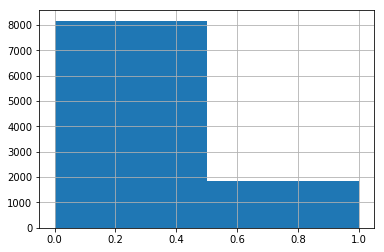

In [9]:
synthesized['type'].hist(bins=2, range=[0, 1])

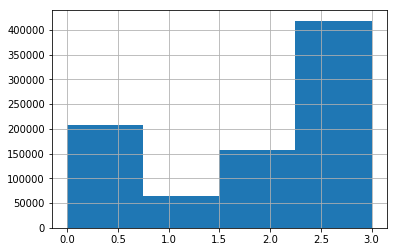

In [10]:
data['operation'].hist(bins=4, range=[0, 3])

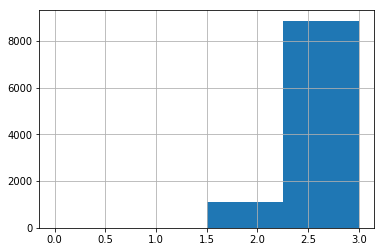

In [11]:
synthesized['operation'].hist(bins=4, range=[0, 3])

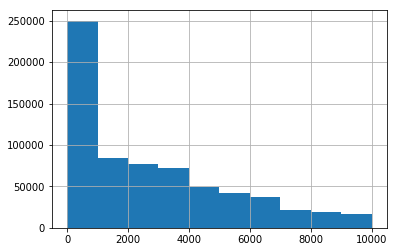

In [12]:
data['amount'].hist(bins=10, range=[0.0, 10000.0])

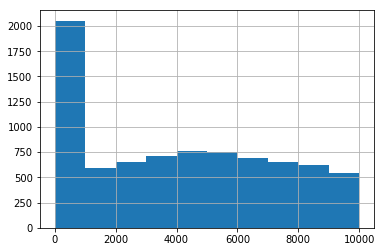

In [13]:
synthesized['amount'].hist(bins=10, range=[0.0, 10000.0])

# Tests to confirm the utility of synthetic data 

In [14]:
from synthesized.testing.testing_environment import estimate_utility
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [17]:
estimate_utility(
    df_orig=data, df_synth=synthesized,
    continuous_columns=['amount'],  categorical_columns=['type', 'operation'],
    classifier=DecisionTreeClassifier(), regressor=DecisionTreeRegressor()
)

,target_column,estimator,baseline_original_score,original_score,baseline_synth_score,synth_score,orig_error,synth_error,score_utility,error_utility
0,amount,DecisionTreeRegressor,0.000000,0.199652,0.000000,0.186689,8.174275e+07,8.306670e+07,0.935072,0.984062
1,operation,DecisionTreeClassifier,0.487432,0.976312,0.487432,0.518896,9.140262e-02,2.596201e+00,0.064359,0.035206
2,type,DecisionTreeClassifier,0.741016,1.000000,0.741016,0.785743,0.000000e+00,2.142574e-01,0.172700,0.000000
